Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?


Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.
Technical Requirements:
• Data contains 1460 entries each having 81 variables.
• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
• Extensive EDA has to be performed to gain relationships of important variable and price.
• Data contains numerical as well as categorical variable. You need to handle them accordingly.
• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.
• You need to find important features which affect the price positively or negatively.
• Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on test.csv file.
The “Data file.csv” and “Data description.txt” are enclosed with this file.



ML cycle:
    
    - Data Clean and wrangling
    - Feature engineering 
    - Data pre-processing
    - Feature selection
    - Split the data into training and testing data set.
    - Define the metrics for which model is getting optimized
    - Model selection
    - Model validation
    - Interpret the results.
    

In [3]:
    # importing required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

#Modeling

#Importing libraries 

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

%matplotlib inline

In [4]:
# reading train and test data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [5]:
#checking and studying briefly the train set sample before we do anything:
pd.set_option('display.max_columns', None)
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [6]:
#train dataset shape
train_data.shape

(1168, 81)

In [7]:
#test dataset shape
test_data.shape

(292, 80)

In [8]:
#checking nulls in the train dataset:
pd.set_option('display.max_rows', None)
train_data.isnull().sum().sort_values(ascending=False)

PoolQC           1161
MiscFeature      1124
Alley            1091
Fence             931
FireplaceQu       551
LotFrontage       214
GarageYrBlt        64
GarageFinish       64
GarageType         64
GarageQual         64
GarageCond         64
BsmtExposure       31
BsmtFinType2       31
BsmtQual           30
BsmtCond           30
BsmtFinType1       30
MasVnrType          7
MasVnrArea          7
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
BsmtFullBath        0
TotRmsAbvGrd        0
GarageCars          0
LowQualFinSF        0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
GrLivArea           0
HeatingQC 

In [9]:
#test data nulls:
test_data.isnull().sum().sort_values(ascending=False)

PoolQC           292
MiscFeature      282
Alley            278
Fence            248
FireplaceQu      139
LotFrontage       45
GarageType        17
GarageYrBlt       17
GarageQual        17
GarageCond        17
GarageFinish      17
BsmtCond           7
BsmtFinType2       7
BsmtFinType1       7
BsmtQual           7
BsmtExposure       7
MasVnrArea         1
MasVnrType         1
Electrical         1
HalfBath           0
BsmtFullBath       0
BsmtHalfBath       0
BedroomAbvGr       0
FullBath           0
TotRmsAbvGrd       0
Functional         0
KitchenAbvGr       0
KitchenQual        0
Id                 0
Fireplaces         0
LowQualFinSF       0
GarageCars         0
GarageArea         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
GrLivArea          0
HeatingQC          0
2ndFlrSF           0
LandSlope    

In [10]:
#checking unique values for PoolQC in order to see how we can impute nulls values.
train_data['PoolQC'].unique()

array([nan, 'Ex', 'Gd', 'Fa'], dtype=object)

In [11]:
#in this case of PoolQC, we can impute it with 0 as  i am guessing there is no pool in those houses:
train_data['PoolQC'].fillna(0, inplace=True)

In [12]:
train_data['PoolQC'].unique() #cheking if imputation is implemented correctly:

array([0, 'Ex', 'Gd', 'Fa'], dtype=object)

In [13]:
#checking unique values for Misc Feature:
train_data['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'TenC', 'Othr'], dtype=object)

In [14]:
#we will do the same for the MiscFeature and similar categories where we can the same intention:
cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
for i in cols:
    train_data[i] = train_data[i].fillna(0)
    test_data[i] = test_data[i].fillna(0)

In [15]:
#checking the null values for the remaining features not imputed yet:
train_data.isnull().sum().sort_values(ascending=False).head(13)

LotFrontage     214
GarageFinish     64
GarageType       64
GarageQual       64
GarageCond       64
GarageYrBlt      64
BsmtFinType2     31
BsmtExposure     31
BsmtQual         30
BsmtCond         30
BsmtFinType1     30
MasVnrArea        7
MasVnrType        7
dtype: int64

In [16]:
#cheking unique values for lotFrontage:
train_data['LotFrontage'].unique()

array([ nan,  95.,  92., 105.,  58.,  88.,  70.,  80.,  50.,  44., 129.,
        59.,  55.,  64.,  24.,  68.,  71.,  74.,  61.,  60., 120.,  84.,
       141.,  30.,  65.,  76., 100.,  85.,  75., 107., 122.,  82.,  62.,
        73.,  79.,  77.,  41.,  69.,  90.,  96.,  72.,  34.,  78.,  63.,
        40.,  98., 160., 108., 128.,  51.,  81.,  99.,  66.,  37., 174.,
        87.,  53., 152.,  47.,  86.,  56.,  89.,  35.,  52.,  21., 104.,
        57.,  83.,  46., 101., 112., 149.,  93.,  49.,  43., 130.,  54.,
        91.,  67.,  97., 110., 103., 115.,  94.,  48.,  36., 313., 109.,
       144., 121., 102., 116., 182.,  32.,  42., 168., 118.,  38., 140.,
       134., 114., 124.,  39., 111.,  45., 106., 153.])

In [17]:
#as we see above, the values are numerical which means we can apply mean of the values of the feature LotFrontage to the nan:
train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean(), inplace=True)
test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean(), inplace=True)

In [18]:
#chekcing if imputation of mean got executed correctly:
train_data['LotFrontage'].unique()

array([ 70.9884696,  95.       ,  92.       , 105.       ,  58.       ,
        88.       ,  70.       ,  80.       ,  50.       ,  44.       ,
       129.       ,  59.       ,  55.       ,  64.       ,  24.       ,
        68.       ,  71.       ,  74.       ,  61.       ,  60.       ,
       120.       ,  84.       , 141.       ,  30.       ,  65.       ,
        76.       , 100.       ,  85.       ,  75.       , 107.       ,
       122.       ,  82.       ,  62.       ,  73.       ,  79.       ,
        77.       ,  41.       ,  69.       ,  90.       ,  96.       ,
        72.       ,  34.       ,  78.       ,  63.       ,  40.       ,
        98.       , 160.       , 108.       , 128.       ,  51.       ,
        81.       ,  99.       ,  66.       ,  37.       , 174.       ,
        87.       ,  53.       , 152.       ,  47.       ,  86.       ,
        56.       ,  89.       ,  35.       ,  52.       ,  21.       ,
       104.       ,  57.       ,  83.       ,  46.       , 101. 

In [19]:
#checking remaining nulls again:
train_data.isnull().sum().sort_values(ascending=False).head(13)

GarageYrBlt     64
GarageCond      64
GarageFinish    64
GarageQual      64
GarageType      64
BsmtExposure    31
BsmtFinType2    31
BsmtCond        30
BsmtFinType1    30
BsmtQual        30
MasVnrArea       7
MasVnrType       7
KitchenQual      0
dtype: int64

In [20]:
#Setting all the null values of each feature to their respective mode:
cols = [
    'GarageCond','GarageQual',
    'GarageFinish','GarageType','GarageYrBlt', 'GarageYrBlt','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1',
'MasVnrType'
]
for i in cols:
    train_data[i] = train_data[i].fillna(train_data[i].mode()[0])
    test_data[i] = test_data[i].fillna(test_data[i].mode()[0])


In [21]:
#checking if imputation is implemented correctly, just checking a few columns:
cols = ['GarageCond','GarageQual',
    'GarageFinish','GarageType']
for i in cols:
    print(train_data[i].unique())

['TA' 'Fa' 'Gd' 'Po' 'Ex']
['TA' 'Fa' 'Gd' 'Ex' 'Po']
['RFn' 'Unf' 'Fin']
['Attchd' 'BuiltIn' 'Detchd' 'Basment' '2Types' 'CarPort']


In [22]:
#chekcing the unique values of MasVnrType:
train_data['MasVnrType'].unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn'], dtype=object)

In [23]:
#checking the remaining nulls pending to be imputed:
train_data.isnull().sum().sort_values(ascending=False).head(13)

MasVnrArea      7
Id              0
GarageFinish    0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
dtype: int64

In [24]:
#imputing the mean to MasVnrArea:
train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mean(), inplace=True)
test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mean(), inplace=True)

In [25]:
test_data.isnull().sum().sort_values(ascending=False).head(13)

Electrical      1
Id              0
BedroomAbvGr    0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
HalfBath        0
MSSubClass      0
FullBath        0
dtype: int64

In [26]:
#checking the null values for test features and imputing the null values with the same point of view as training set:
test_data['Electrical'].unique()

array(['SBrkr', 'FuseA', 'FuseP', nan, 'FuseF'], dtype=object)

In [27]:
#imputing the missing values of feature electrical with mode of the same feature:
test_data['Electrical'] = test_data['Electrical'].fillna(test_data['Electrical'].mode()[0])

In [28]:
#checking there is no more null values in the Electrical Feature:
test_data['Electrical'].unique()

array(['SBrkr', 'FuseA', 'FuseP', 'FuseF'], dtype=object)

In [29]:
#checking there is no more null values in testing set:
test_data.isnull().sum().sort_values(ascending=False).head(13)

Id              0
MSSubClass      0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
dtype: int64

In [30]:
#checking there is no more null values in training set:
train_data.isnull().sum().sort_values(ascending=False).head(13)

Id              0
CentralAir      0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
dtype: int64

In [31]:
#shape of the training set:
train_data.shape

(1168, 81)

In [32]:
#training set detailed information:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          1168 non-null   object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

<AxesSubplot:>

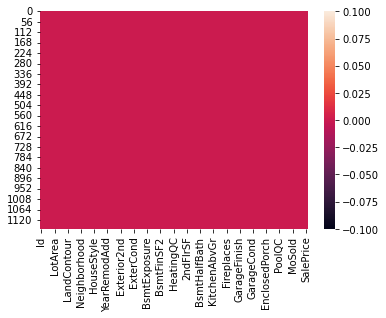

In [34]:
#double checking there is no null values through a heatmap (just extra step, no needed as we know from aove df.info all the columns have total non-null values):
sns.heatmap(train_data.isnull())

In [35]:
#chekcing unique values for all training dataset features including the target:
for i in train_data.columns:
    print(train_data[i].unique())

[127 889 793 ... 196  31 617]
[120  20  60  50  70  30 160  85  45  90  40  80 190  75 180]
['RL' 'RM' 'FV' 'RH' 'C (all)']
[ 70.9884696  95.         92.        105.         58.         88.
  70.         80.         50.         44.        129.         59.
  55.         64.         24.         68.         71.         74.
  61.         60.        120.         84.        141.         30.
  65.         76.        100.         85.         75.        107.
 122.         82.         62.         73.         79.         77.
  41.         69.         90.         96.         72.         34.
  78.         63.         40.         98.        160.        108.
 128.         51.         81.         99.         66.         37.
 174.         87.         53.        152.         47.         86.
  56.         89.         35.         52.         21.        104.
  57.         83.         46.        101.        112.        149.
  93.         49.         43.        130.         54.         91.
  67.         97. 

In [36]:
for col in train_data.columns:    
    print(train_data[col].value_counts())
    print('---------------------------------------')

127     1
1391    1
1389    1
448     1
1179    1
821     1
178     1
1076    1
60      1
733     1
739     1
1192    1
263     1
582     1
392     1
327     1
89      1
317     1
1287    1
841     1
218     1
436     1
1108    1
548     1
619     1
489     1
282     1
925     1
812     1
1345    1
104     1
1182    1
284     1
990     1
923     1
784     1
627     1
889     1
1283    1
876     1
1034    1
68      1
322     1
445     1
674     1
928     1
966     1
675     1
892     1
106     1
1233    1
453     1
1196    1
1355    1
916     1
1195    1
891     1
1128    1
403     1
459     1
225     1
274     1
364     1
813     1
478     1
1281    1
1054    1
319     1
1015    1
1265    1
366     1
307     1
82      1
720     1
292     1
1205    1
993     1
1367    1
75      1
1446    1
663     1
1103    1
463     1
1173    1
1270    1
1294    1
376     1
460     1
161     1
1300    1
57      1
1401    1
350     1
175     1
1051    1
235     1
209     1
915     1
240     1
1418    1


In [ ]:
#now let's check some statistic description of the data:

In [37]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.988470,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1979.717466,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,22.437056,8957.442311,1.390153,1.124343,30.145255,20.785185,182.047152,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,25.012983,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.988470,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1984.500000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,79.250000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

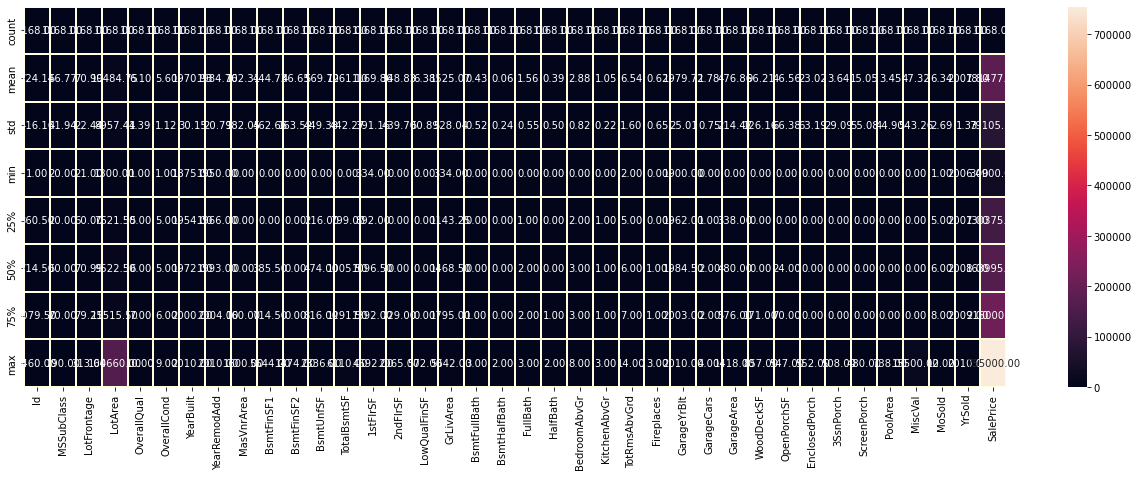

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(train_data.describe(),annot=True,linewidth=0.1,linecolor="lightyellow",fmt="0.2f")

In [39]:
#sns.displot(train_data)

In the above describe table, we can see that there is no null values left as we see full number of instances in the first row of the describe table.

In the same above table, we can see the skewness of the data.

If we check feature by feature, i see that YearBuilt, YearRemodAdd, FullBath, BedroomAbvGr, Fireplaces, GarageYrBlt, GarageCars,GarageArea, and YrSold and the features that has left-negative skewness. 

On the other hand, the remaining features except LotFrontage has right-positive skewness.

And LotFrontage has no skewness. It's the case for a symmetric distribution, means the mean is overall balanced out.

Regarding the outliers, we see our dataset has outliers in all its features including the target SalePrice as we can see aand notice it when comparing the 75% percentile and maximum of each feature and we see there is huge difference between the 75% and the maximum of same feature.

<AxesSubplot:>

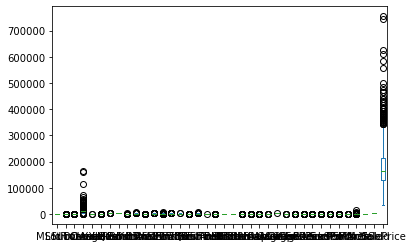

In [40]:
#training data set boxplot:
train_data.plot(kind='box')

Id                  AxesSubplot(0.125,0.749828;0.0824468x0.130172)
MSSubClass       AxesSubplot(0.223936,0.749828;0.0824468x0.130172)
LotFrontage      AxesSubplot(0.322872,0.749828;0.0824468x0.130172)
LotArea          AxesSubplot(0.421809,0.749828;0.0824468x0.130172)
OverallQual      AxesSubplot(0.520745,0.749828;0.0824468x0.130172)
OverallCond      AxesSubplot(0.619681,0.749828;0.0824468x0.130172)
YearBuilt        AxesSubplot(0.718617,0.749828;0.0824468x0.130172)
YearRemodAdd     AxesSubplot(0.817553,0.749828;0.0824468x0.130172)
MasVnrArea          AxesSubplot(0.125,0.593621;0.0824468x0.130172)
BsmtFinSF1       AxesSubplot(0.223936,0.593621;0.0824468x0.130172)
BsmtFinSF2       AxesSubplot(0.322872,0.593621;0.0824468x0.130172)
BsmtUnfSF        AxesSubplot(0.421809,0.593621;0.0824468x0.130172)
TotalBsmtSF      AxesSubplot(0.520745,0.593621;0.0824468x0.130172)
1stFlrSF         AxesSubplot(0.619681,0.593621;0.0824468x0.130172)
2ndFlrSF         AxesSubplot(0.718617,0.593621;0.0824468x0.130

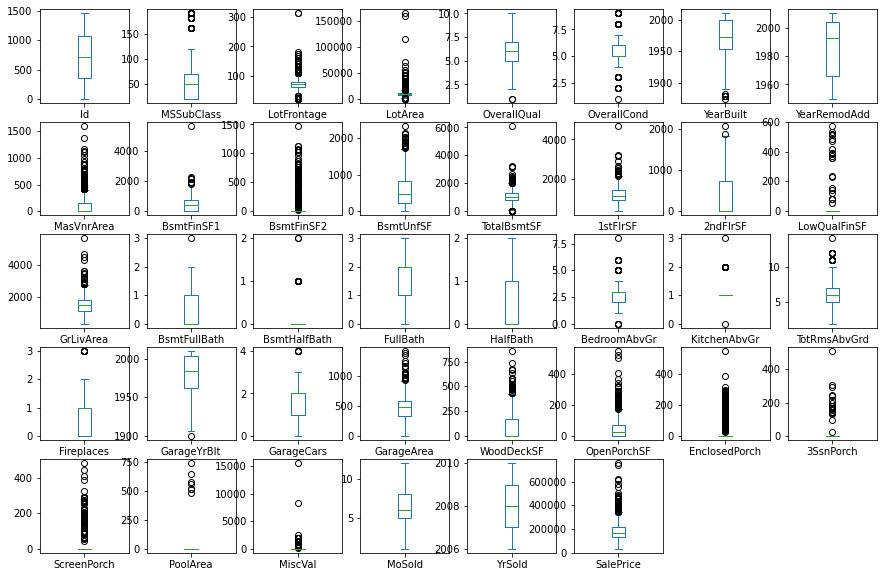

In [41]:
#as the above boxplot is not that useful, we will plot the boxplot feature by feature:
train_data.plot(kind='box',subplots = True,layout=(5,8),figsize = (15,10))

As we said previously, we have outliers all over the features including our target variable SalePrice.

<AxesSubplot:>

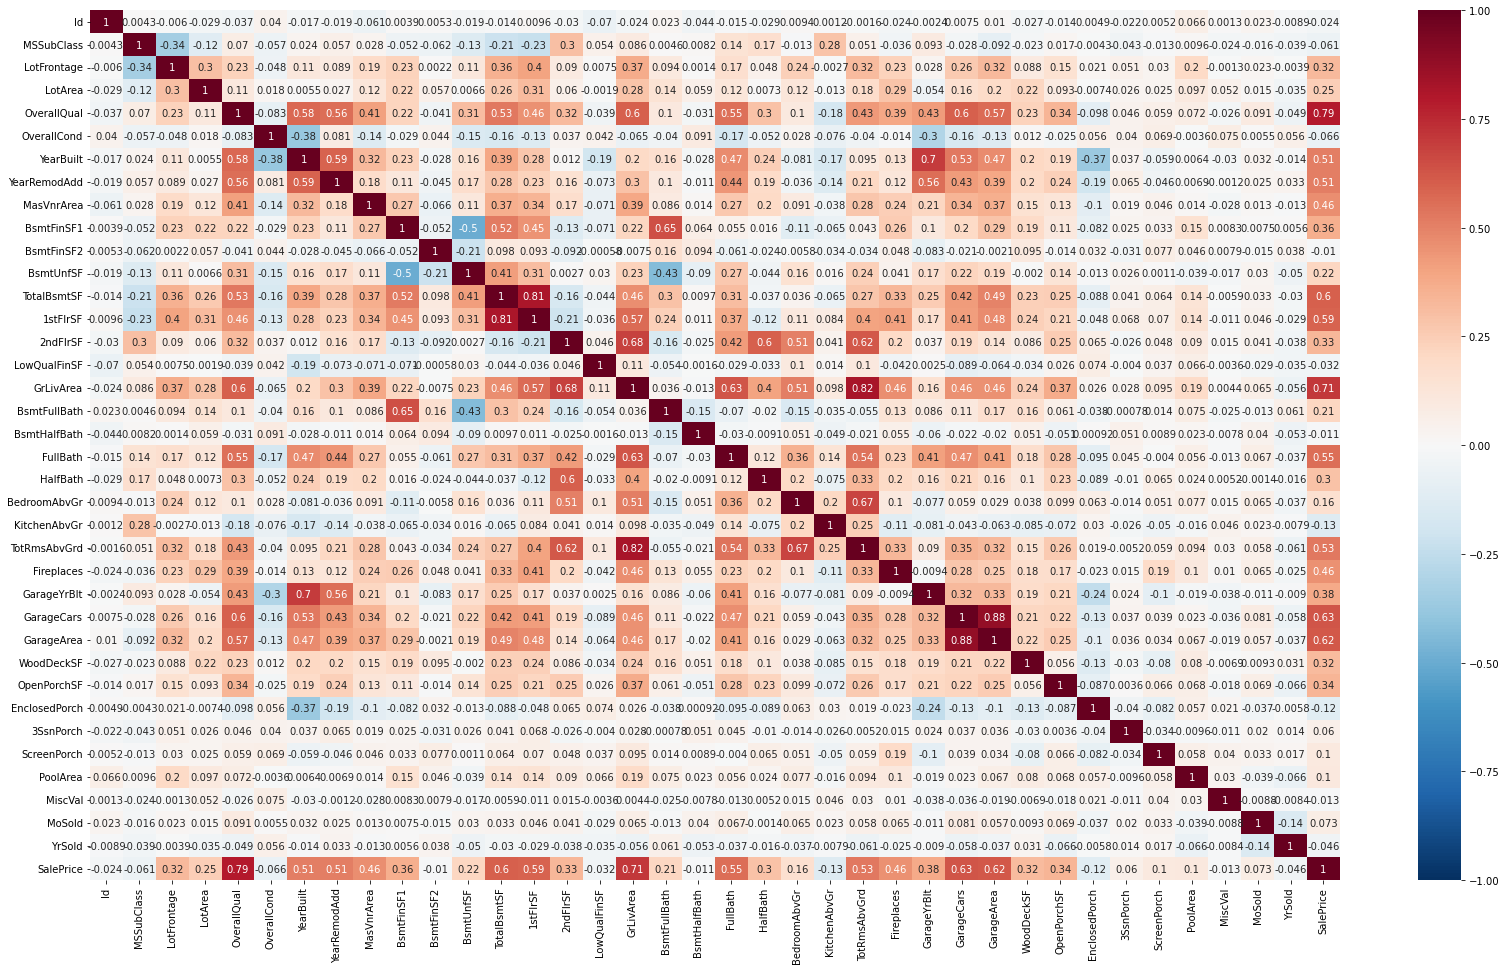

In [42]:
#Corelation between features/variables:
correlation = train_data.corr()
plt.figure(figsize=(28, 16))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

Checking the above correlation heatmap, we can see that


If we concentrate on the target and check the best correlations against it, then we will see that the following features are considered the best correlated features within our dataset:


<AxesSubplot:>

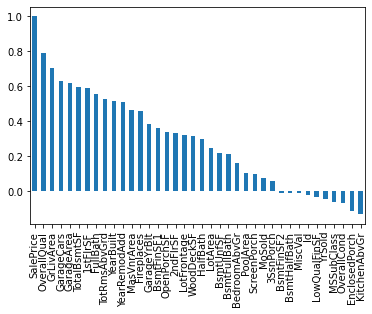

In [43]:
#correlation of independent features with regards the target "Price"
correlations =train_data.corr()['SalePrice'].sort_values(ascending=False)
correlations.plot(kind='bar')

So here are the answers to the following questions:

• Which variables are important to predict the price of variable? 

We see several features such as OverrallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, Fullbath, TotRmsAbvGrd, YearBuilt, YearRemodAdd among the features shown in the above screenshot are the features that have higher impact comparing all the available features.

• How do these variables describe the price of the house?
These variables have higher impact on the target then the others when comparing the percentage of correlation. So, the higher correlation, more probability to have higher impact.

Let’s plot these features against our target variable SalePrice and check the relation and outliers:


In [44]:
correlations

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.463626
Fireplaces       0.459611
GarageYrBlt      0.381997
BsmtFinSF1       0.362874
OpenPorchSF      0.339500
2ndFlrSF         0.330386
LotFrontage      0.323779
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
BedroomAbvGr     0.158281
PoolArea         0.103280
ScreenPorch      0.100284
MoSold           0.072764
3SsnPorch        0.060119
BsmtFinSF2      -0.010151
BsmtHalfBath    -0.011109
MiscVal         -0.013071
Id              -0.023897
LowQualFinSF    -0.032381
YrSold          -0.045508
MSSubClass      -0.060775
OverallCond     -0.065642
EnclosedPorch   -0.115004
KitchenAbvGr    -0.132108
Name: SalePr

In [45]:
correlations[abs(correlations) > 0.2]

SalePrice       1.000000
OverallQual     0.789185
GrLivArea       0.707300
GarageCars      0.628329
GarageArea      0.619000
TotalBsmtSF     0.595042
1stFlrSF        0.587642
FullBath        0.554988
TotRmsAbvGrd    0.528363
YearBuilt       0.514408
YearRemodAdd    0.507831
MasVnrArea      0.463626
Fireplaces      0.459611
GarageYrBlt     0.381997
BsmtFinSF1      0.362874
OpenPorchSF     0.339500
2ndFlrSF        0.330386
LotFrontage     0.323779
WoodDeckSF      0.315444
HalfBath        0.295592
LotArea         0.249499
BsmtUnfSF       0.215724
BsmtFullBath    0.212924
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'Price by OverallQual')

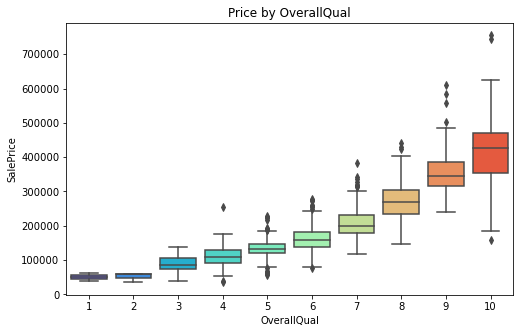

In [31]:
#boxplotting the Saleprice by OverallQual:
plt.figure(figsize=(8,5))
sns.boxplot(x='OverallQual',y='SalePrice',data=train_data, palette='rainbow')
plt.title("Price by OverallQual")

As we can see in the above boxplot the SalesPrice gets higher when the higher gets the rates of the overall material and finish of the house.

We also see some outliers in the above boxplot (black dots).


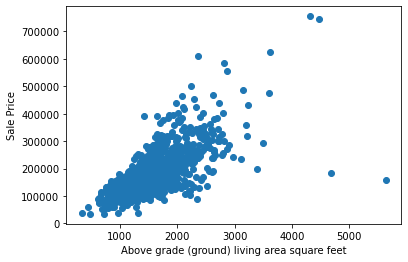

In [6]:
#Then, we boxplot the Above grade (ground) living area square feet with regards our target SalePrice:
plt.scatter(x=train_data['GrLivArea'], y=train_data['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

We see the relation is kind of linear and positive relation.
The more Above grade (ground) living area square feet we have, higher the Sale Price gets.

Regarding the outlier, we also have some outliers that are far away from the average cluster (high gathering of data).

Text(0.5, 1.0, 'Price by Garage Cars')

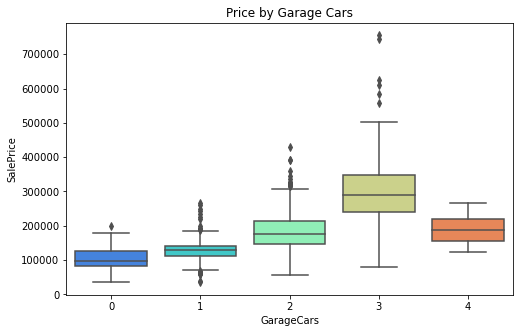

In [32]:
#Next, we boxplot the SalePrice y diferents categories of GarageCars:
plt.figure(figsize=(8,5))
sns.boxplot(x='GarageCars',y='SalePrice',data=train_data, palette='rainbow')
plt.title("Price by Garage Cars")

In the above boxplot we see that Garage of 3 cars is the highest rated. The surprising thing is that the 3cars Garage is more expensive than 4car garage which has a similar average Sale Price as the 2cars garage. 

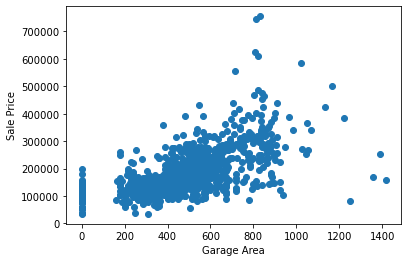

In [7]:
#boxplotting the price by Garage Area:
plt.scatter(x=train_data['GarageArea'], y=train_data['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

By Garage Area, we see the price is higher when the more garage area is acquired. We also see outliers outside the main segment/cluster and some outliers are far away from the main cluster.

Text(0.5, 1.0, 'Price by FullBath')

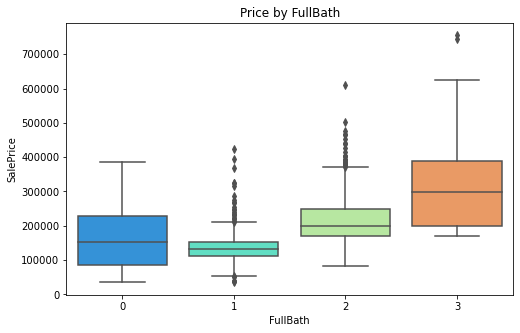

In [33]:
#Let’s check now the sale price by full bath:
plt.figure(figsize=(8,5))
sns.boxplot(x='FullBath',y='SalePrice',data=train_data, palette='rainbow')
plt.title("Price by FullBath")

As we see in the boxplot above, we have higher dispersion of Sale Price when talking about the grade 0 and 3 of full bathrooms compared to others.

As we see the black dots in the boxplot, we have some outliers too.


Text(0.5, 1.0, 'Price by Total rooms above grade')

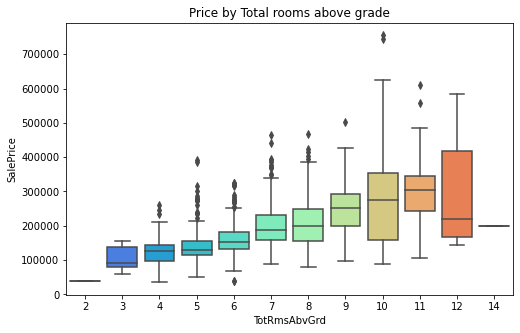

In [34]:
#boxplotting the price by total Rooms above grade:
plt.figure(figsize=(8,5))
sns.boxplot(x='TotRmsAbvGrd',y='SalePrice',data=train_data, palette='rainbow')
plt.title("Price by Total rooms above grade")

We see the price dispersion gets higher as the total rooms above grade has higher number of rooms. We also notice some kind of dispersion or data when talking about 10 and 12 rooms above grade.

Here we also have outliers for rooms 4,5,6,7,8,9,10,11.

Text(0.5, 1.0, 'Price by Year Built')

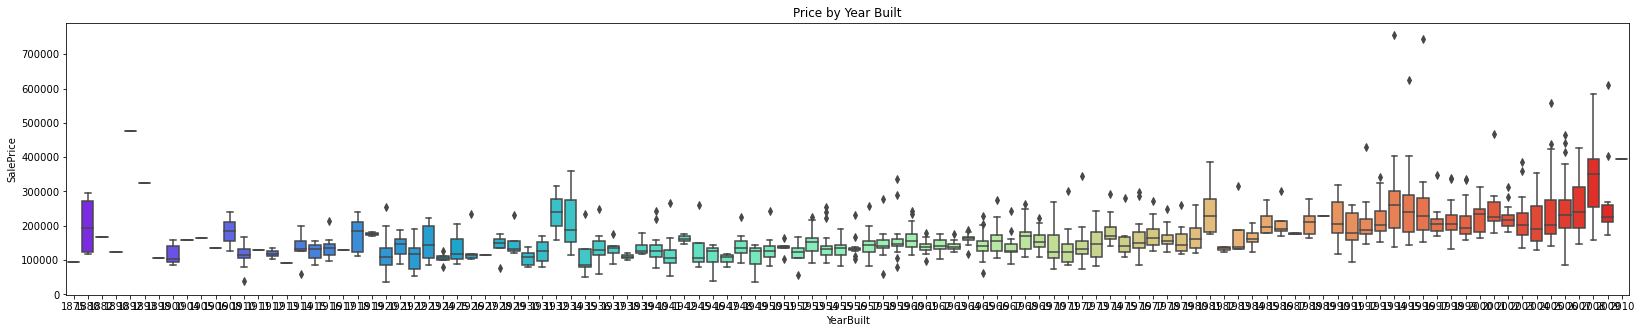

In [35]:
#Now let’s check the Year Built variable with respect our target SalesPrice:
plt.figure(figsize=(28,5))
sns.boxplot(x='YearBuilt',y='SalePrice',data=train_data, palette='rainbow')
plt.title("Price by Year Built")

Text(0.5, 1.0, 'Price by YearRemodAdd')

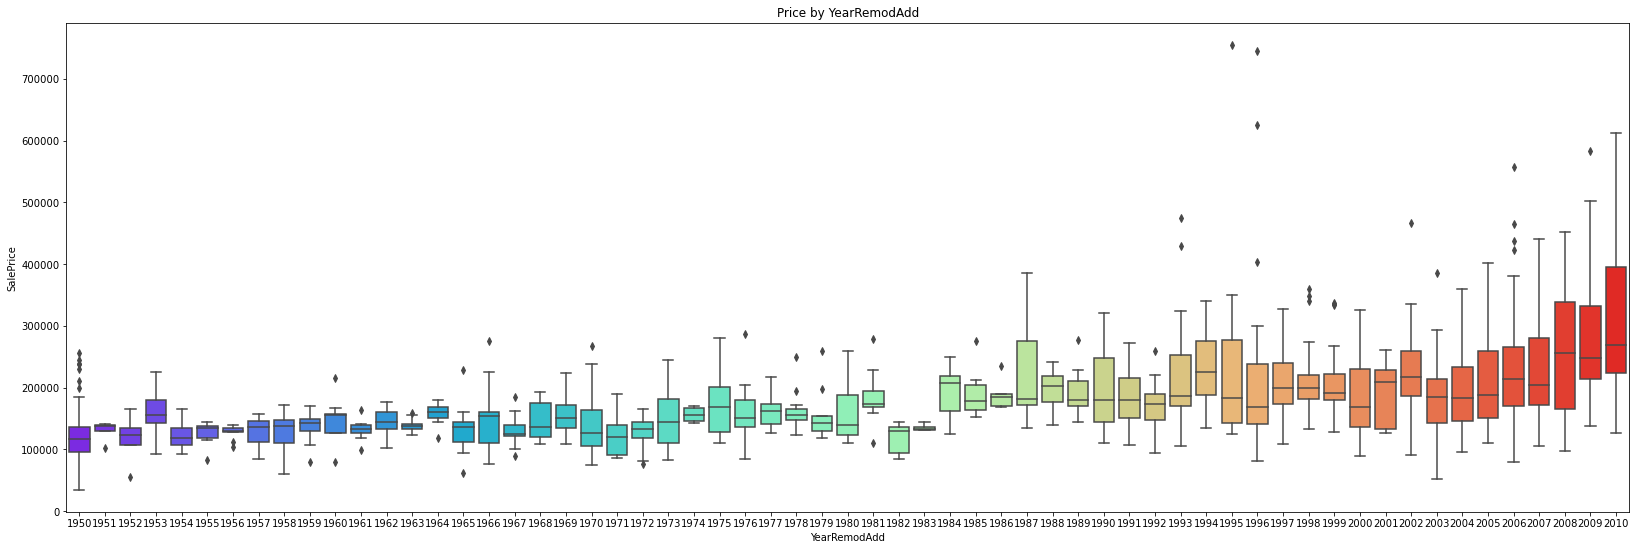

In [36]:
#Now let’s check the YearRemodAdd variable with respect our target SalesPrice:
plt.figure(figsize=(28,9))
sns.boxplot(x='YearRemodAdd',y='SalePrice',data=train_data, palette='rainbow')
plt.title("Price by YearRemodAdd")

Similar case happens here too, the higher the Year gets, the higher is the dispersion of the price in most of the cases (both in the Year Built and YearRemodAdd comparison with SalePrice). 

In [57]:

#checking for strong correlations between all features we have in our training dataset:
correlation_mat = train_data.corr()

corr_pairs = correlation_mat.unstack()


In [58]:
sorted_pairs = corr_pairs.sort_values(ascending=False)


In [59]:
strong_pairs = sorted_pairs[abs(sorted_pairs)<1]
strong_pairs = strong_pairs[abs(strong_pairs)>0.5]
print(strong_pairs)

GarageCars    GarageArea      0.877542
GarageArea    GarageCars      0.877542
TotRmsAbvGrd  GrLivArea       0.821845
GrLivArea     TotRmsAbvGrd    0.821845
TotalBsmtSF   1stFlrSF        0.813357
1stFlrSF      TotalBsmtSF     0.813357
SalePrice     OverallQual     0.789185
OverallQual   SalePrice       0.789185
SalePrice     GrLivArea       0.707300
GrLivArea     SalePrice       0.707300
YearBuilt     GarageYrBlt     0.702527
GarageYrBlt   YearBuilt       0.702527
GrLivArea     2ndFlrSF        0.684802
2ndFlrSF      GrLivArea       0.684802
BedroomAbvGr  TotRmsAbvGrd    0.672542
TotRmsAbvGrd  BedroomAbvGr    0.672542
BsmtFinSF1    BsmtFullBath    0.645126
BsmtFullBath  BsmtFinSF1      0.645126
GarageCars    SalePrice       0.628329
SalePrice     GarageCars      0.628329
FullBath      GrLivArea       0.626275
GrLivArea     FullBath        0.626275
2ndFlrSF      TotRmsAbvGrd    0.619871
TotRmsAbvGrd  2ndFlrSF        0.619871
GarageArea    SalePrice       0.619000
SalePrice     GarageArea 

Here above we found the highest correlation we have in our dataset for all kind of features including the target.

Text(0.5, 1.0, 'GarageArea by Number of cars that can be parked in Garage')

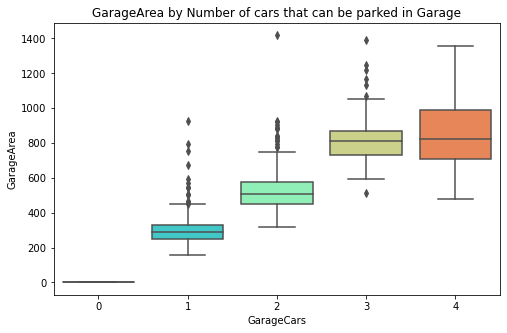

In [37]:
#Let’s know analyse the boxplot of the Garage Area with respect Garage Cars:
plt.figure(figsize=(8,5))
sns.boxplot(x='GarageCars',y='GarageArea',data=train_data, palette='rainbow')
plt.title("GarageArea by Number of cars that can be parked in Garage")

Makes fully sense, the higher the GarageCars number is, the higher have to be the GarageArea. On the other way around, means that as more garage area we have, more cars can be parked in that space. We can also notice that 4 cars garage has more dispersion then the other ones.

Here we also have some outliers in black dots.


Text(0.5, 1.0, 'GrLivArea by TotRmsAbvGrd')

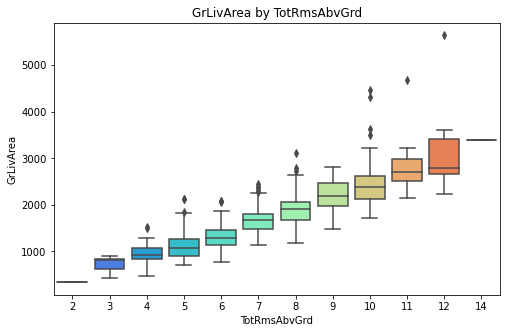

In [38]:
#Let’s now boxplot the GrLivArea by TotRmsAbvGrd:
plt.figure(figsize=(8,5))
sns.boxplot(x='TotRmsAbvGrd',y='GrLivArea',data=train_data, palette='rainbow')
plt.title("GrLivArea by TotRmsAbvGrd")

We easily see that the higher the total rooms above grade are, the higher it has to be the Ground Live Area.

As expected, in this case, we also have outliers in this feature.


Text(0.5, 1.0, 'TotRmsAbvGrd by BedroomAbvGr')

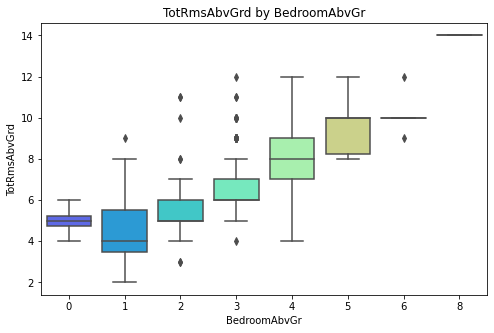

In [39]:
#Let’s check the boxplot for TotRmsAbvGrd by BedroomAbvGr:
plt.figure(figsize=(8,5))
sns.boxplot(x='BedroomAbvGr',y='TotRmsAbvGrd',data=train_data, palette='rainbow')
plt.title("TotRmsAbvGrd by BedroomAbvGr")

We can see the Total rooms above grade (does not include bathrooms) has high dispersion among the Bedrooms above grade atleast for 1 and 4 bedrooms. 
And regarding ouliers, we have one for 1 bedroom above grade and several for 2 or 3  bedrooms  above the grade and a couple of outliers for 6 bedrooms above grade.
If we check 6 or 8 bedrooms above the grade, we can see no boxplot is plotted on those 2 categories which mean no data is there for these 2 missing boxplots, or at least either the data is 0 or there is no data.


Text(0.5, 1.0, 'GrLivArea by FullBath')

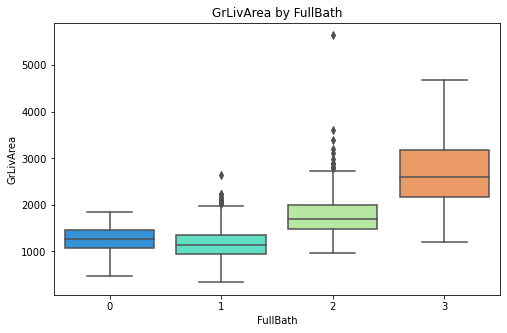

In [40]:
#Now let’s check the Grade Live Area and compare it by Full Baths:
plt.figure(figsize=(8,5))
sns.boxplot(x='FullBath',y='GrLivArea',data=train_data, palette='rainbow')
plt.title("GrLivArea by FullBath")

Make sense, as the higher counts of baths above the grade would use higher space of Grade Live Area.
What we can see highlighted here is that the 3 full bathrooms above grade have more dispersion of data than the other ones.

Regarding outliers, we see many outliers for 1 full bathroom and 2 bathrooms above grade as I suppose these are the most constructed ones in the houses.


Text(0.5, 1.0, 'GrLivArea by OverallQual')

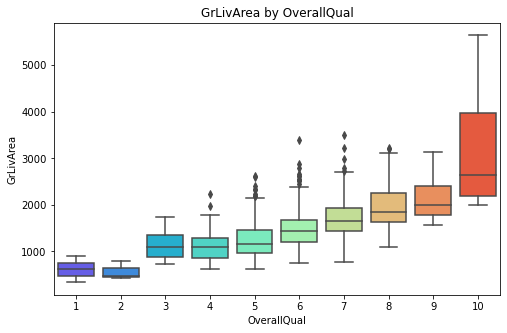

In [41]:
#Now let’s check the GrLivArea with regards Overallqual:
plt.figure(figsize=(8,5))
sns.boxplot(x='OverallQual',y='GrLivArea',data=train_data, palette='rainbow')
plt.title("GrLivArea by OverallQual")

It shows what normally happens, the Ground Live Area has more definition and importance when we normally have good qualification rates for the overall material and finish of the house. The grade Live Area is even higher and besides it has higher dispersion when the overall material rate and finish gets a rate of 10, an excellent rate for a house as of material and finish of the house.
Looking at the outliers, we have several for overall qualifications between 4 to 8.


Text(0.5, 1.0, '2ndFlrSF by HalfBath')

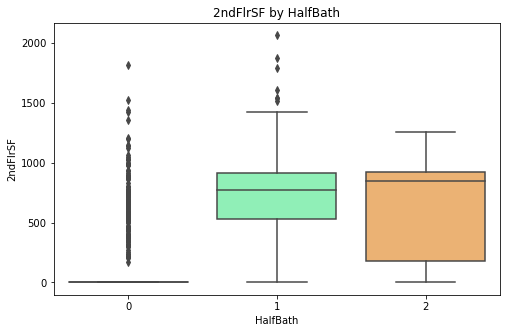

In [42]:
#Now let’s check the boxplot of 2ndFlrSF with regards Half Bath:
plt.figure(figsize=(8,5))
sns.boxplot(x='HalfBath',y='2ndFlrSF',data=train_data, palette='rainbow')
plt.title("2ndFlrSF by HalfBath")

So here we see the Half Bath 1 above grade has less dispersion with regards the the 2nd Floor Square Feet than the Half Bath 2.
Interesting, I have never seen such details before. But, what I am guessing is that this data or conclusion of this plot is not as useful as other ones. I think I should have not included in my analysis but let’s keep it.
Maybe it is useful for our business user, never say no. But, from my personal perspective I would have excluded it from my analysis.


Text(0.5, 1.0, 'OverallQual by GarageCars')

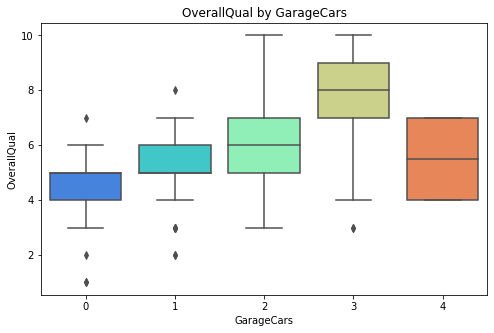

In [43]:
#Now, let’s check the overall qualification/rate of the overall material with regards the number of cars in the garage:
plt.figure(figsize=(8,5))
sns.boxplot(x='GarageCars',y='OverallQual',data=train_data, palette='rainbow')
plt.title("OverallQual by GarageCars")

We see, again, the cars garage seems to have higher overall rate for material and house finish when we have garage going from 0 to 2 cars. But as we previously commented, it is interesting to see that the garage of 3 cars has higher rate for overall material and house finish.

As you can see above,we have outliers for 0, 1 and 3 cars garage.


Text(0.5, 1.0, 'OverallQual by YearBuilt')

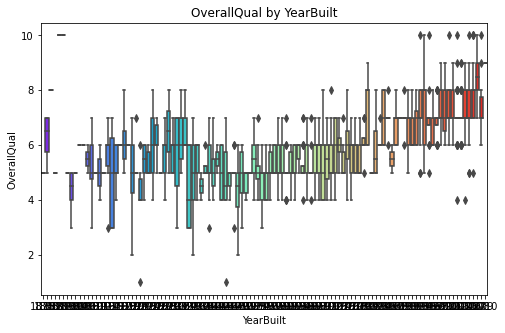

In [44]:
#boxplotting the overallQual by YEAR Built.
plt.figure(figsize=(8,5))
sns.boxplot(x='YearBuilt',y='OverallQual',data=train_data, palette='rainbow')
plt.title("OverallQual by YearBuilt")

NO patterns that can de useful for our analisis. We only comment we can do is that we have higher overallQual over the time.

Text(0.5, 1.0, 'YearRemodAdd by GarageYrBlt')

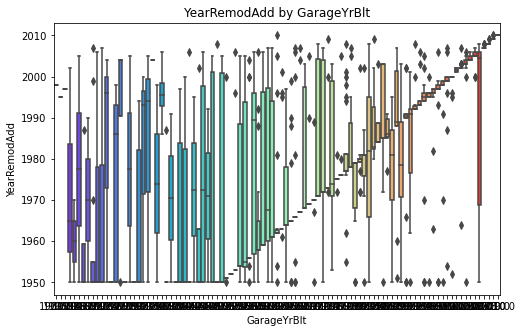

In [45]:
#boxplotting the YearRemodAdd by YearBuilt
plt.figure(figsize=(8,5))
sns.boxplot(x='GarageYrBlt',y='YearRemodAdd',data=train_data, palette='rainbow')
plt.title("YearRemodAdd by GarageYrBlt")

No useful patterns.

Text(0.5, 1.0, 'YearRemodAdd by GarageYrBlt')

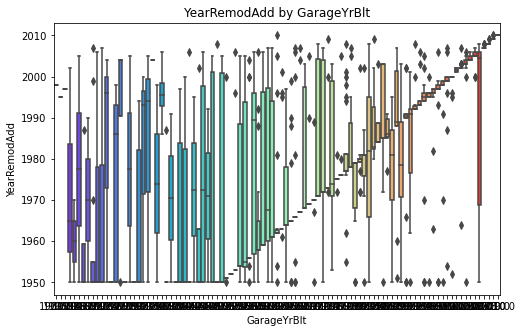

In [46]:
#boxplotting the YearRemodAdd by GarageYrBuilt:
plt.figure(figsize=(8,5))
sns.boxplot(x='GarageYrBlt',y='YearRemodAdd',data=train_data, palette='rainbow')
plt.title("YearRemodAdd by GarageYrBlt")

Again, no useful patterns for our analisis.

Text(0.5, 1.0, 'YearRemodAdd by OverallQual')

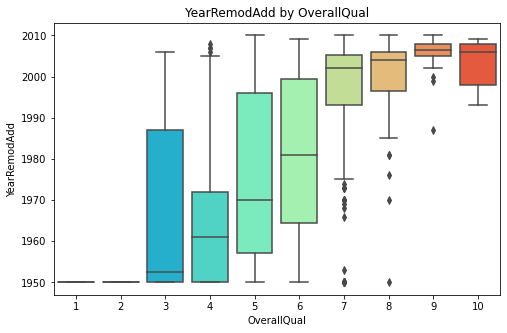

In [47]:
#boxplotting YearRemodAdd by the OverallQual:
plt.figure(figsize=(8,5))
sns.boxplot(x='OverallQual',y='YearRemodAdd',data=train_data, palette='rainbow')
plt.title("YearRemodAdd by OverallQual")

Here we can highlight that we have more dispersion over the years when we have overallqualification between 3 and 6. This is because over the years we have more houses being qualified between 3 and 6 rates as rate of overall material and house finish.

And with regards the outliers, we have several outliers for overall rate of 7, 8 or 9 when these rates are for years different than the normally included in the boxplot’box.

Text(0.5, 1.0, 'FullBath by OverallQual')

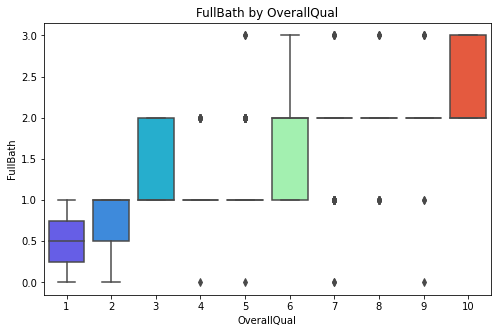

In [48]:
#Let’s see the FullBath with regards OverallQual:
plt.figure(figsize=(8,5))
sns.boxplot(x='OverallQual',y='FullBath',data=train_data, palette='rainbow')
plt.title("FullBath by OverallQual")

We see no such relation, but we can mention that the higher the qualification is, the higher is the dispersion of the data of full bath.
This is another case of relation that doesn’t get us any useful information for our analysis as there is no relation that can be studied and investigated more in detail. So, in my personal opinion, I would have deleted from my personal analysis.


Text(0.5, 1.0, 'TotalBsmtSF by OverallQual')

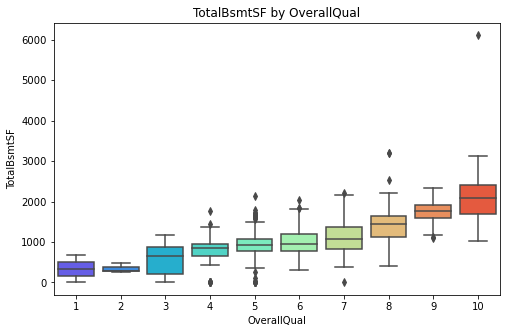

In [49]:
#boxplotting the TotalBsmtSF by OverallQual:
plt.figure(figsize=(8,5))
sns.boxplot(x='OverallQual',y='TotalBsmtSF',data=train_data, palette='rainbow')
plt.title("TotalBsmtSF by OverallQual")

Here what we see in the above boxplot is that the higher the Total Basement square Feet is, the higher is the overall material and house finish is. For me, it made sense when I thought about it in depth. The bigger the basement square is, the higher amount of good material and house finish it would need and have.

Text(0.5, 1.0, 'YearBuilt by GarageCars')

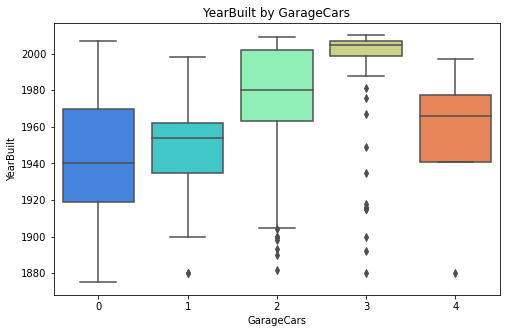

In [50]:
#Now let’s check the Year Built by the Garage Cars variable:
plt.figure(figsize=(8,5))
sns.boxplot(x='GarageCars',y='YearBuilt',data=train_data, palette='rainbow')
plt.title("YearBuilt by GarageCars")

As overview, we see almost all the garageCars are built after 1920.

Another conclusion we can make here is that 0 cars Garages have been built year between 1920 and 1970. And 1 car garages have been built between years 1940 and 1960.  

And we can highlight that the 2 and 3 cars garage are the garage that were constructed recently. Being specific, 3 cars garage is the most recent category of garage. People have more money, hehe!

And finally 4 cars garage were built from year 1940 and 1990, with one outlier/exception that one of these garage was built around year 1880.

Continuing commenting on the outliers, we see the 3 cars garage has more outliers than the other categories as all the data for it is displayed mostly in the few recent years basically around year 2000. And it has outliers in the previous years as the 3 cars garage would also have been built in some other previous years to year 2000. 

And we see we have several outliers for 2 cars garage and 1 outlier for 1 car garage.

Let’s explain the last one so that we have an idea of what we have been commenting till now regarding outliers. So, if we take the boxplot of garage for 1 car we see that almost all the data is dispersed between years 1930 and 1960. But we have one outlier which means that we have one 1car garage that was built previous to 1930 and that was in year 1880.



Text(0.5, 1.0, '2ndFlrSF by BedroomAbvGr')

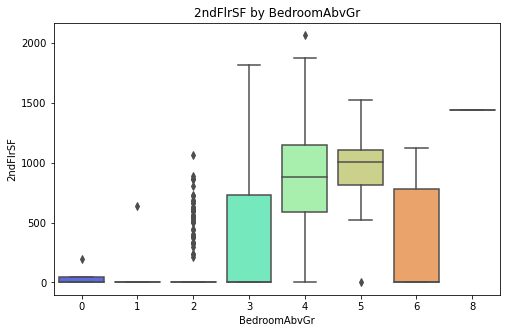

In [51]:
#Now let’s try to relate 2ndFlrSF with BedroomAbvGr and see if we find any considerable relation between them:
plt.figure(figsize=(8,5))
sns.boxplot(x='BedroomAbvGr',y='2ndFlrSF',data=train_data, palette='rainbow')
plt.title("2ndFlrSF by BedroomAbvGr")

At first sight, we see that bedrooms above grade between 3 and 6 has higher probability to have some kind of relation with the second floor square feet. Let’s see. So checking the boxplot, we see that 3 and 6 bedrooms above grade have higher dispersion of data with regards the 2nd Floor square Feet than the 4 or 5 bedrooms above grade.

And we can notice the 5 bedrooms above grade has the smallest dispersion compared with the other categories when we are relating it to the 2nd Floor square feet.

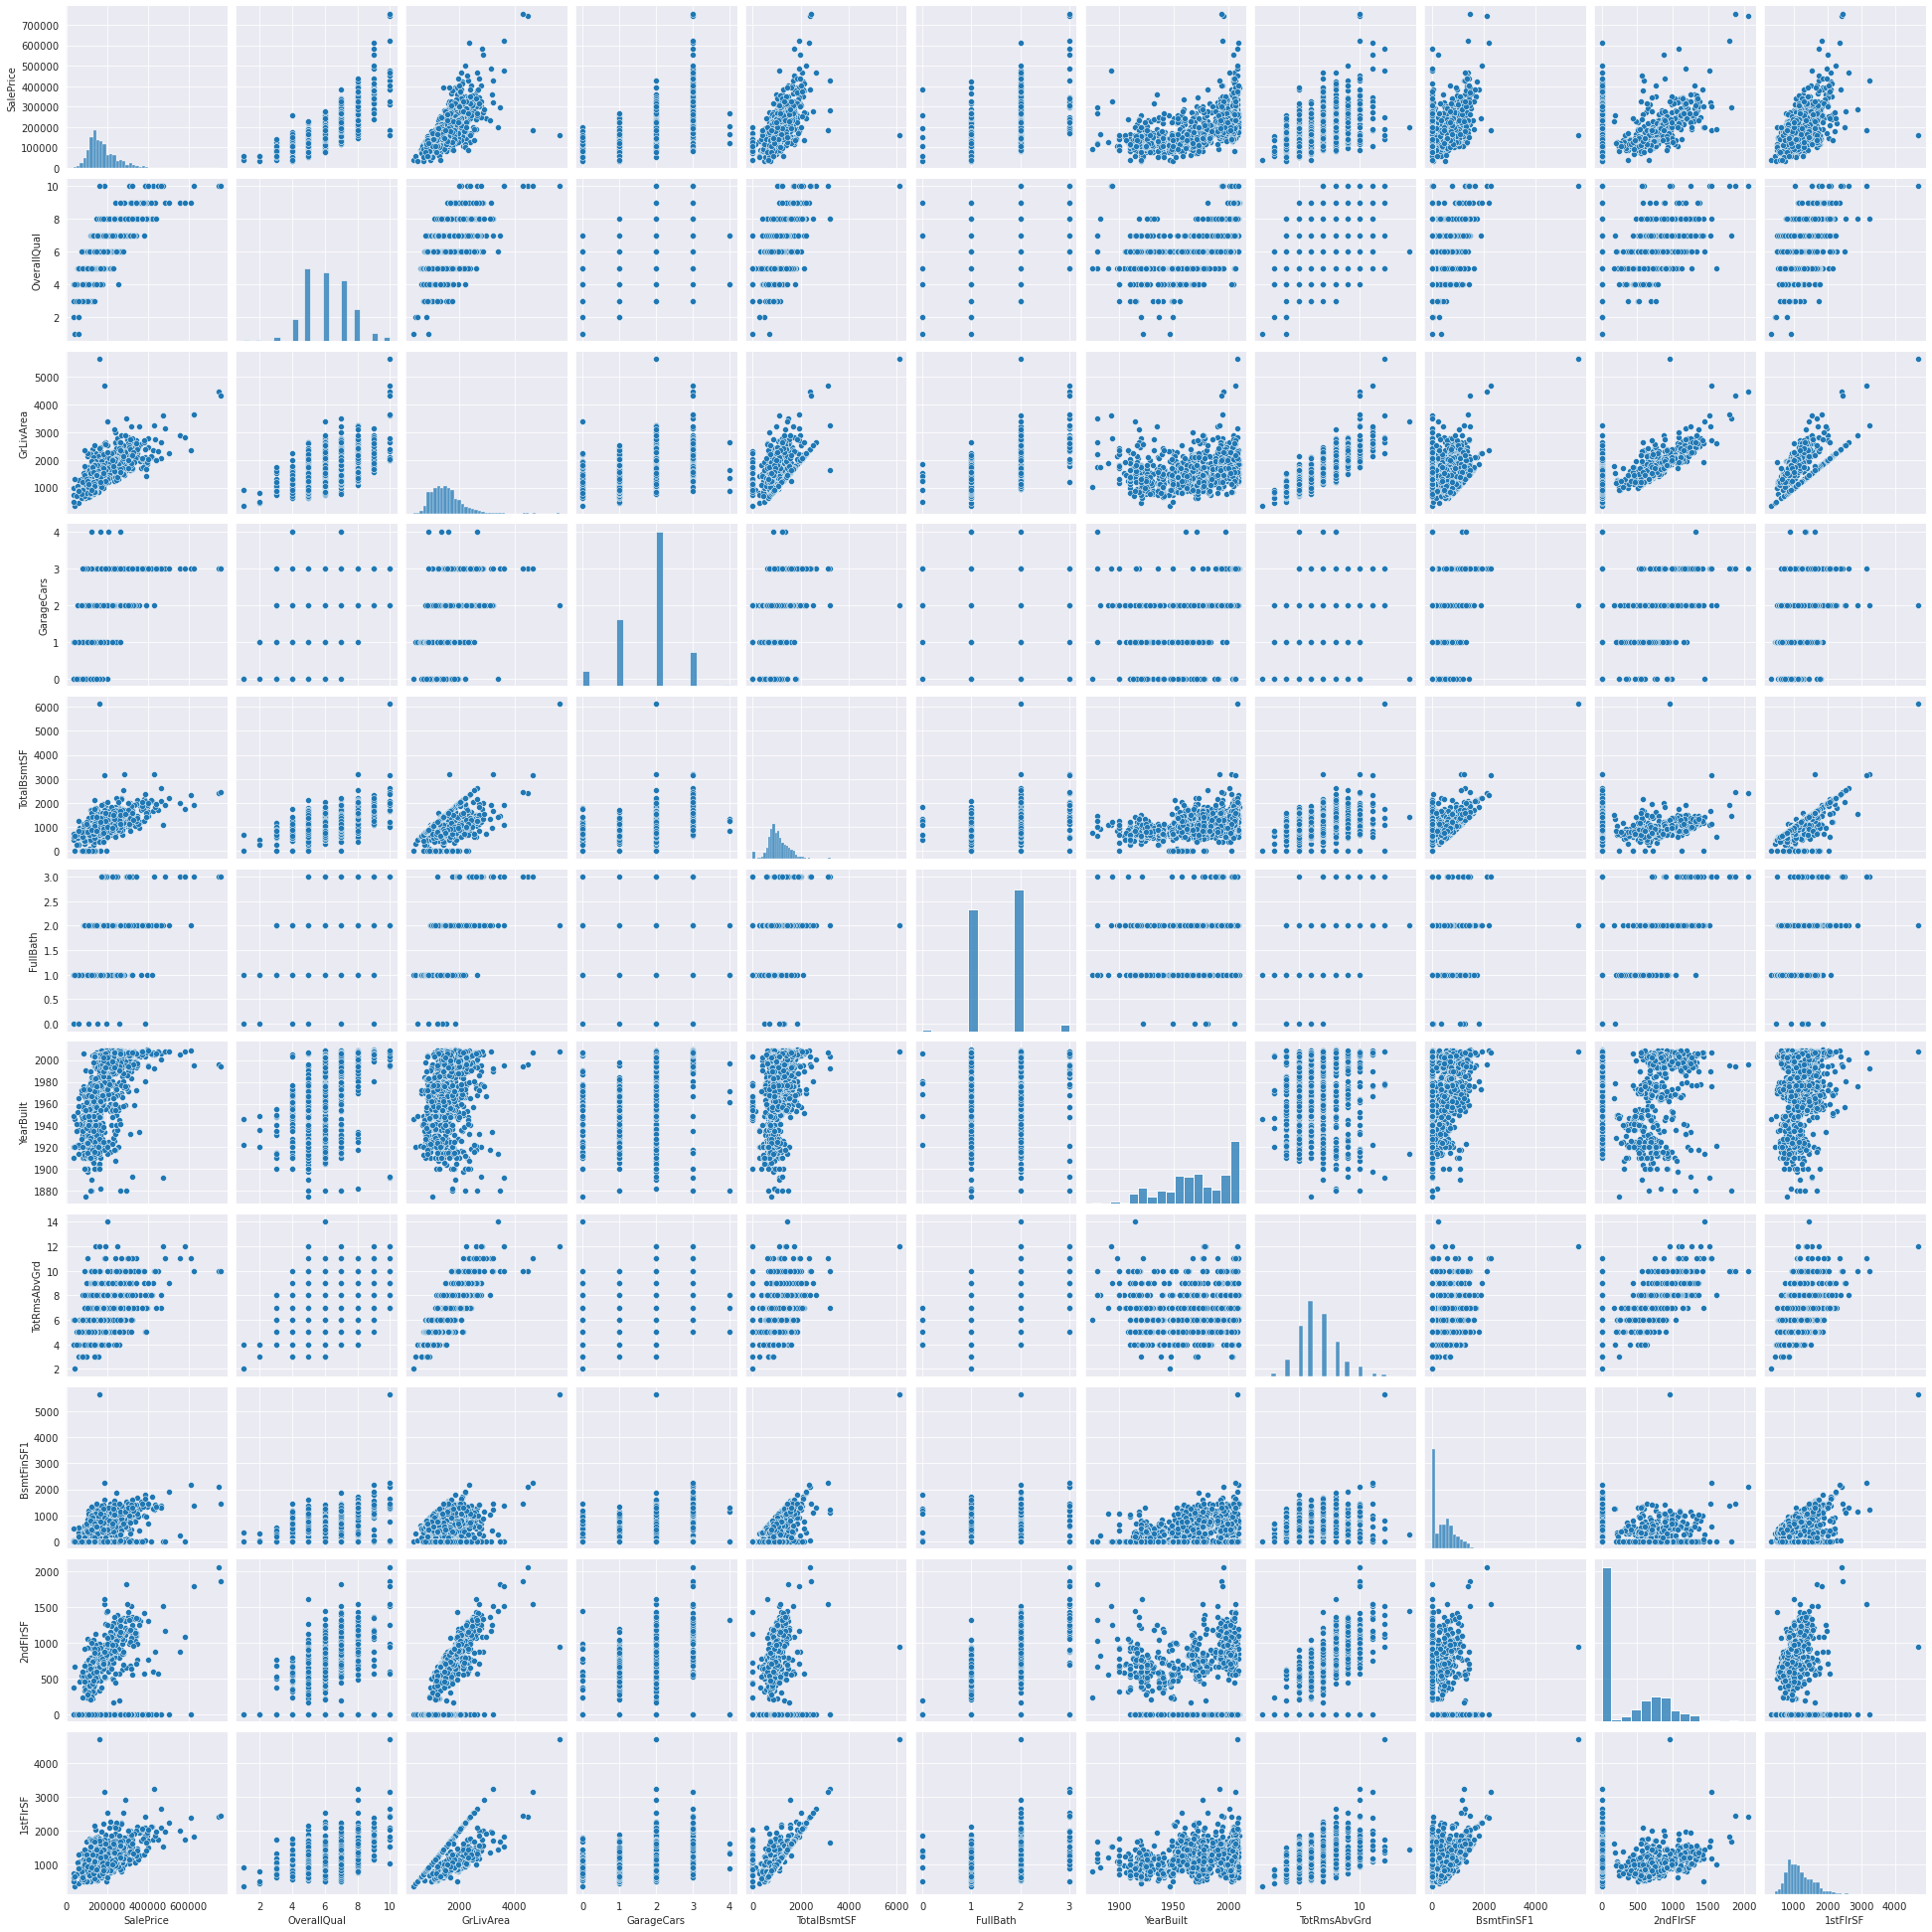

In [17]:
#let's now pairplot of all important features we have in order to check their type of relationship:
sns.set_style('darkgrid') 
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', \
        'TotalBsmtSF', 'FullBath', 'YearBuilt','TotRmsAbvGrd','BsmtFinSF1', '2ndFlrSF', '1stFlrSF']
sns.pairplot(train_data[cols]) 

Looking at the above pairplot, we see some features have linear relationship between them and others haven't have that linear relationship.

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBath'

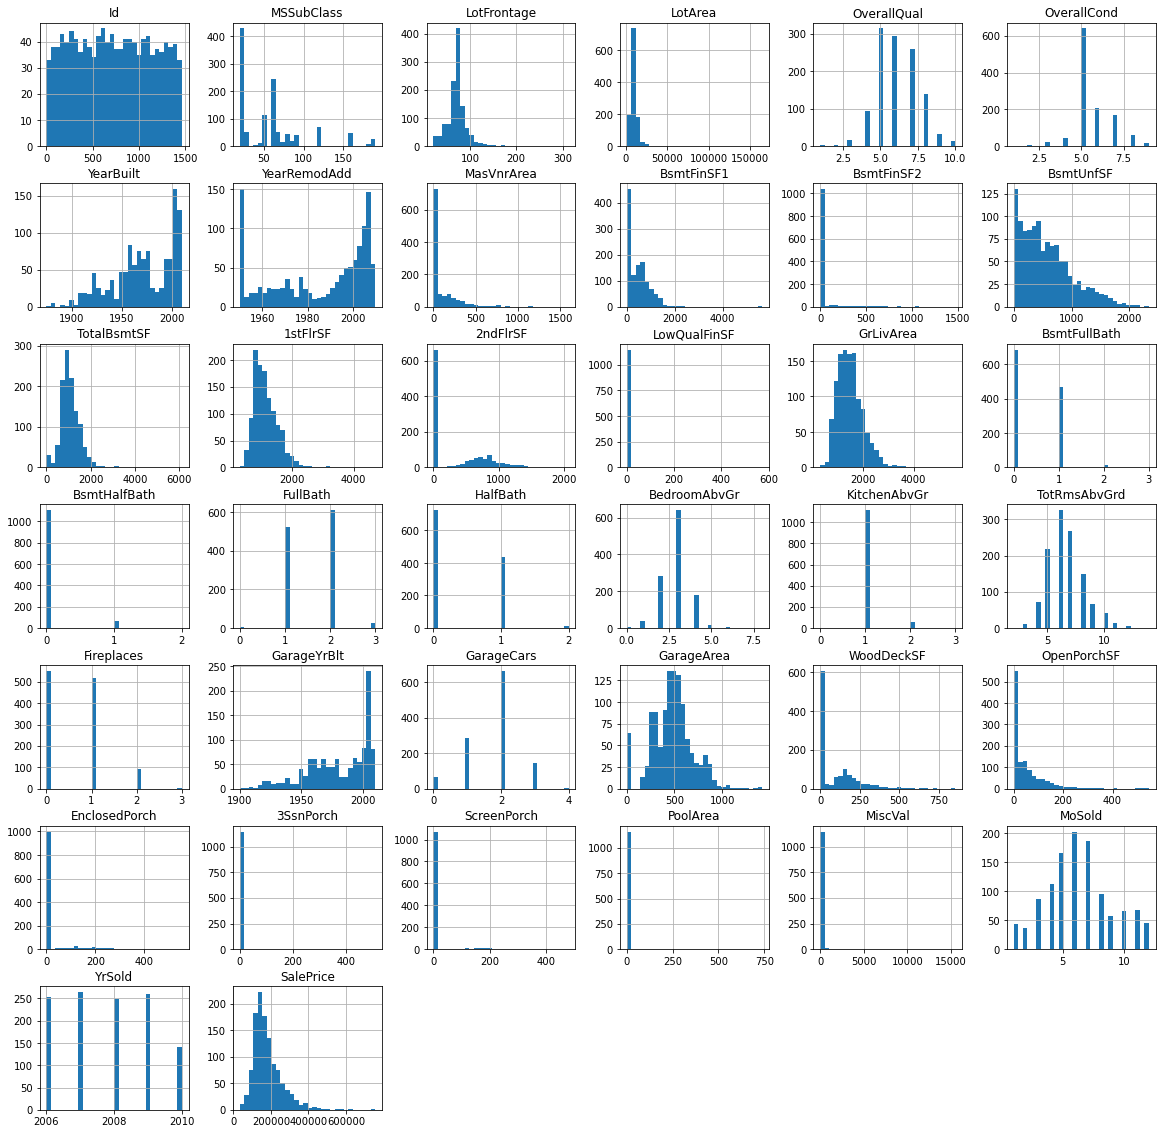

In [86]:
#we will plot histrogram for our numerical data to check skewness of the distribution:
'''Histogram : to see the numeric data distribution'''
train_data.hist(figsize=(20,20), grid = True, bins = 30)
#bos[''].plot.hist() 

Here we see that almost all the features has some kind of skewness as these are not statically balanced on the medium. In some of the features we have skewness either on the right side or on the left side.

In [87]:
#checking the cases where the price is more than 50k:
train_data[train_data.SalePrice>=500000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
141,1183,60,RL,160.0,15623,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,0,0,7,2007,WD,Abnorml,745000
241,899,20,RL,100.0,12919,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,Ex,Y,SBrkr,2364,0,0,2364,1,0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3,820,TA,TA,Y,0,67,0,0,0,0,0,0,0,0,3,2010,New,Partial,611657
300,1047,60,RL,85.0,16056,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,Stone,208.0,Gd,TA,PConc,Ex,TA,Av,GLQ,240,Unf,0,1752,1992,GasA,Ex,Y,SBrkr,1992,876,0,2868,0,0,3,1,4,1,Ex,11,Typ,1,Gd,BuiltIn,2005.0,Fin,3,716,TA,TA,Y,214,108,0,0,0,0,0,0,0,0,7,2006,New,Partial,556581
423,804,60,RL,107.0,13891,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1734,1734,GasA,Ex,Y,SBrkr,1734,1088,0,2822,0,0,3,1,4,1,Ex,12,Typ,1,Gd,BuiltIn,2009.0,RFn,3,1020,TA,TA,Y,52,170,0,0,192,0,0,0,0,0,1,2009,New,Partial,582933
691,692,60,RL,104.0,21535,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,0,0,0,0,1,2007,WD,Normal,755000
839,1170,60,RL,118.0,35760,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,0,0,0,0,7,2006,WD,Normal,625000
914,179,20,RL,63.0,17423,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,748.0,Ex,TA,PConc,Ex,TA,No,GLQ,1904,Unf,0,312,2216,GasA,Ex,Y,SBrkr,2234,0,0,2234,1,0,2,0,1,1,Ex,9,Typ,1,Gd,Attchd,2009.0,Fin,3,1166,TA,TA,Y,0,60,0,0,0,0,0,0,0,0,7,2009,New,Partial,501837


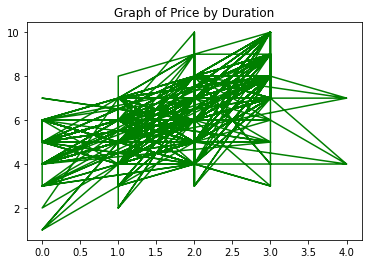

In [88]:
fig = plt.figure()
ax = plt.axes()

x = train_data['GarageCars']
y=train_data['OverallQual']
plt.title('Graph of OverallQual by GarageCars')
ax.plot(x, y, 'g', label='Price')

In [89]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [90]:
train_data.OverallQual.unique()

array([ 6,  8,  7,  5,  9,  1,  2,  4,  3, 10])

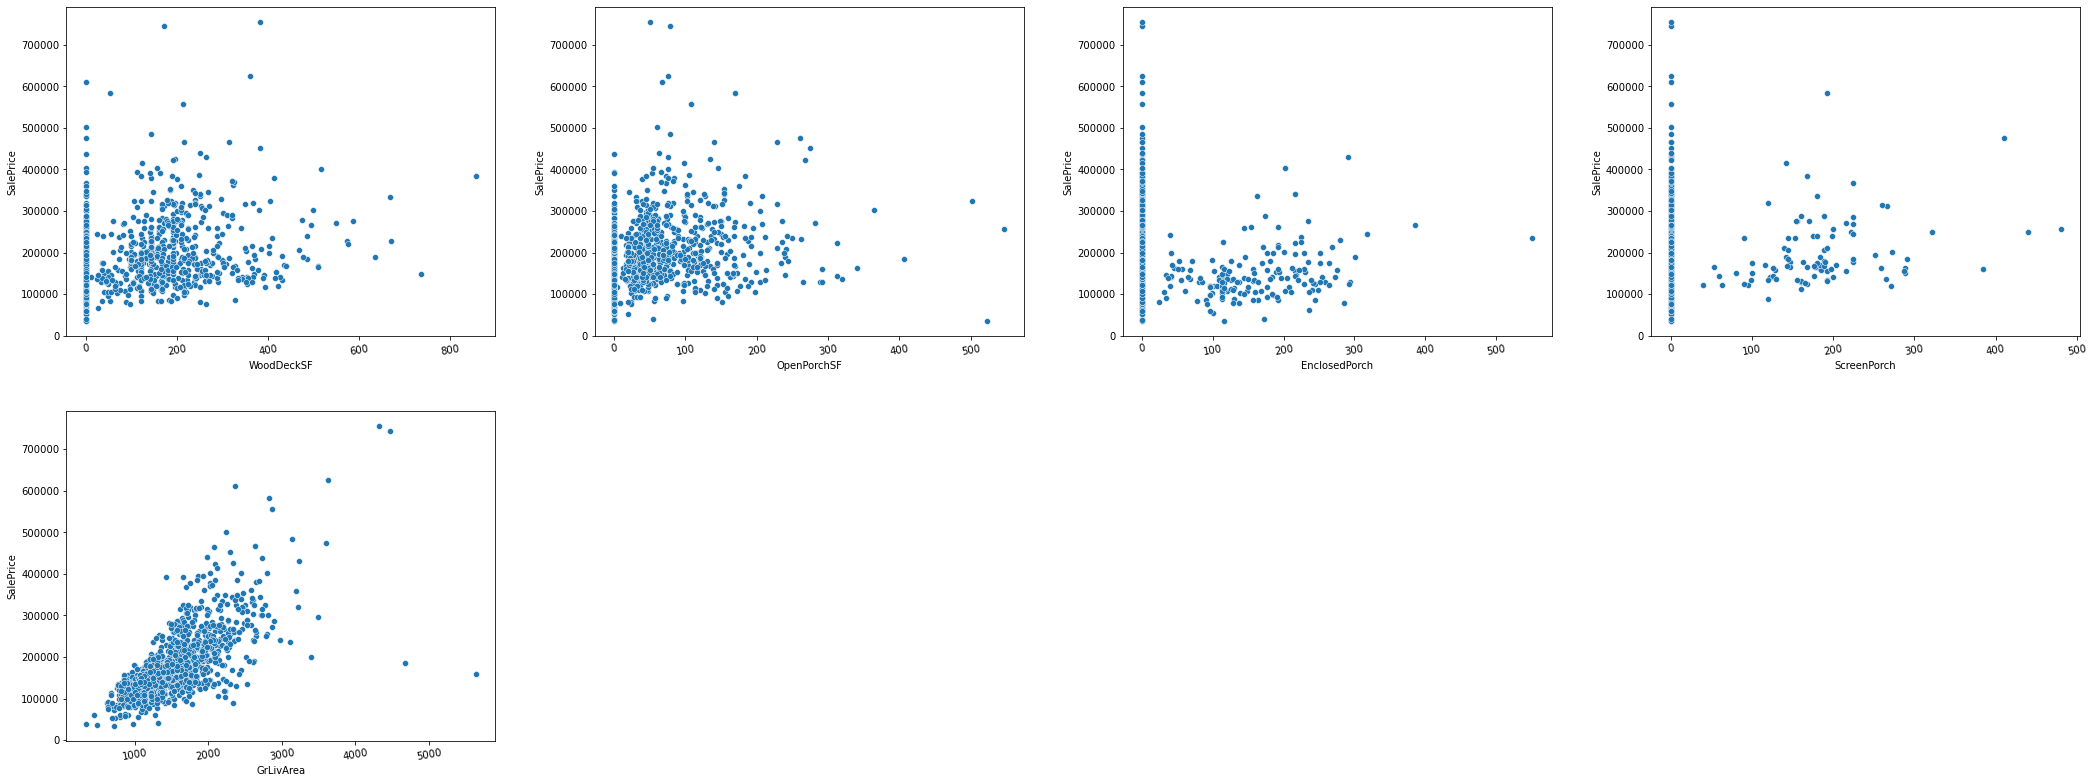

In [98]:
#Numerical features scatterplot of the data dispersion:

numerical=['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch','ScreenPorch', 'GrLivArea']
c=1
plt.figure(figsize=(30,45))
for i in numerical:
    plt.subplot(8,4,c)
    sns.scatterplot(x =train_data[i], y=train_data.SalePrice)
    plt.xticks(rotation=10)
    plt.tight_layout(pad=4)
    c=c+1
plt.show()


In the below swarplots we see the same, the higher the size of garage is, the higher it normally has the rate of overall material and finish house:

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 30.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


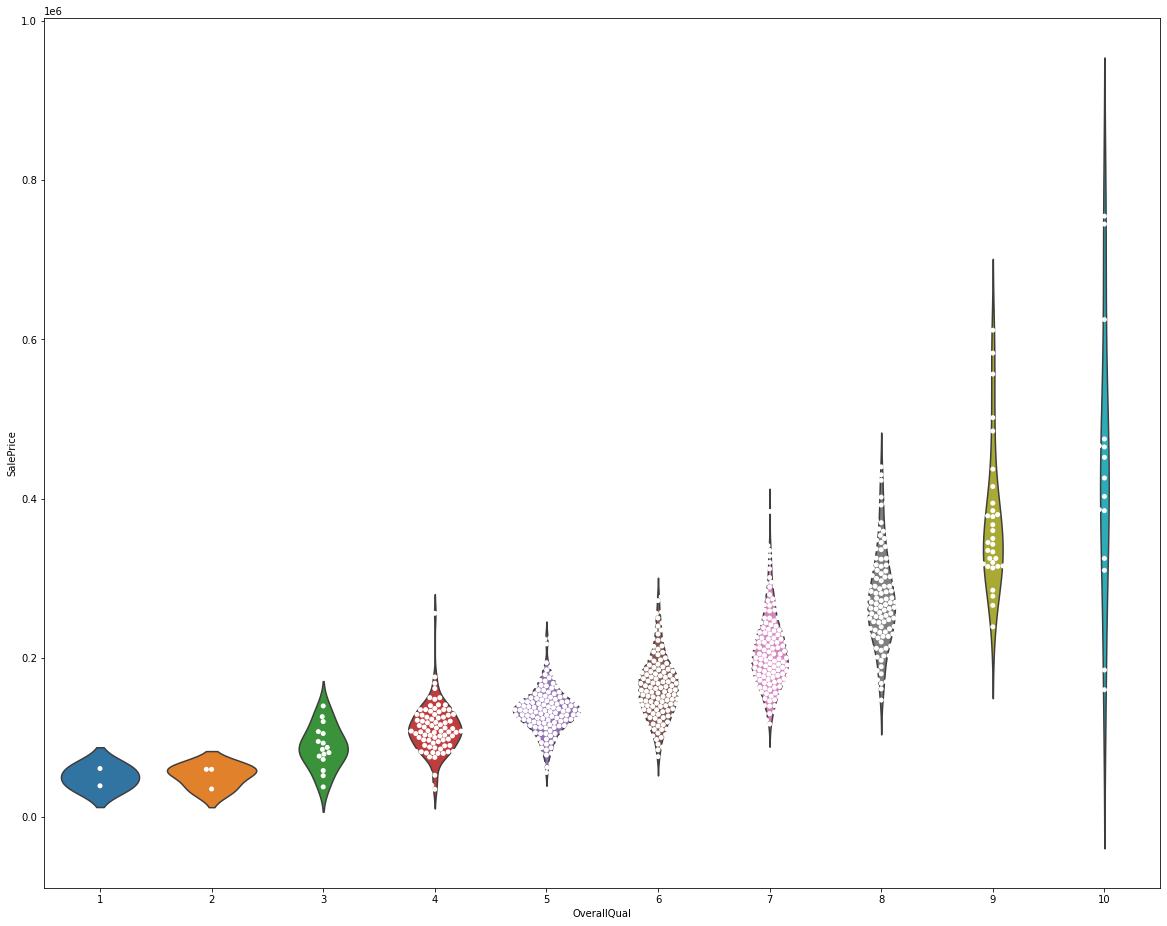

In [91]:
fig, ax = plt.subplots(figsize=(20,16))
axa = sns.violinplot(x="OverallQual", y="SalePrice", data=train_data, inner=None, size=20, height=4, ax=ax)
axb = sns.swarmplot(x="OverallQual", y="SalePrice", data=train_data,
                   color="white", edgecolor="gray")

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 34.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 81.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 89.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 63.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='GarageCars', ylabel='OverallQual'>

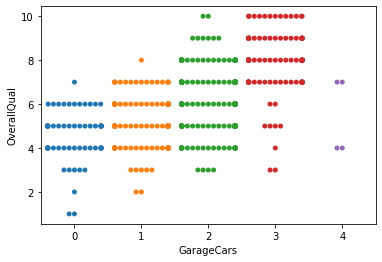

In [92]:
#we will use swrmplot in order to plot price variation by differents routes:
sns.swarmplot(x="GarageCars", y="OverallQual", data=train_data)

Same here,  the higher the size of garage is, the higher it normally has the rate of overall material and finish house:

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 73.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 85.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 50.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


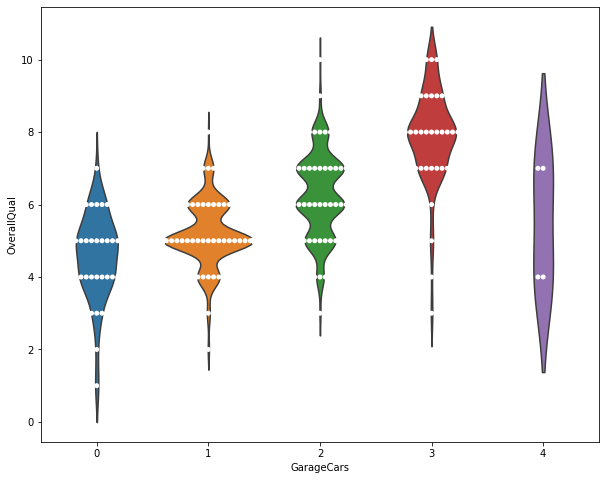

In [93]:
fig, ax = plt.subplots(figsize=(10,8))
axa = sns.violinplot(x="GarageCars", y="OverallQual", data=train_data, inner=None, size=20, height=4, ax=ax)
axb = sns.swarmplot(x="GarageCars", y="OverallQual", data=train_data,
                   color="white", edgecolor="gray")

In the aove violin plot, as we said, the garage for 3 cars has the highest rate of overall material and house finish. The interesting insight here is that even the 4 cars garage has less rate of overall materials and house finish than garage with 3 cars.

<Figure size 1440x1296 with 0 Axes>

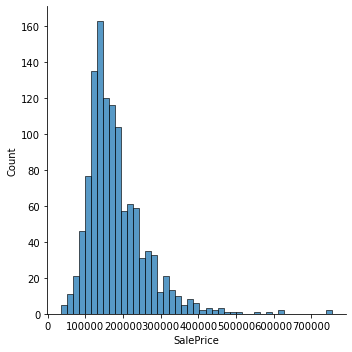

In [94]:
#ploting the Price
plt.figure(figsize=(20,18))
sns.displot(train_data.SalePrice)

Checking the Sale Price from the above distplot, we see some kind of right skewness in it as well as in the below distplots:

In [97]:
#lael encoding the columns with object type data:

from sklearn.preprocessing import LabelEncoder

for col in train_data.columns:
        if train_data[col].dtype == object:
            #train_data[col] = LabelEncoder().fit_transform(train_data[col])
            train_data[col] = LabelEncoder().fit_transform(train_data[col].astype(str))

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

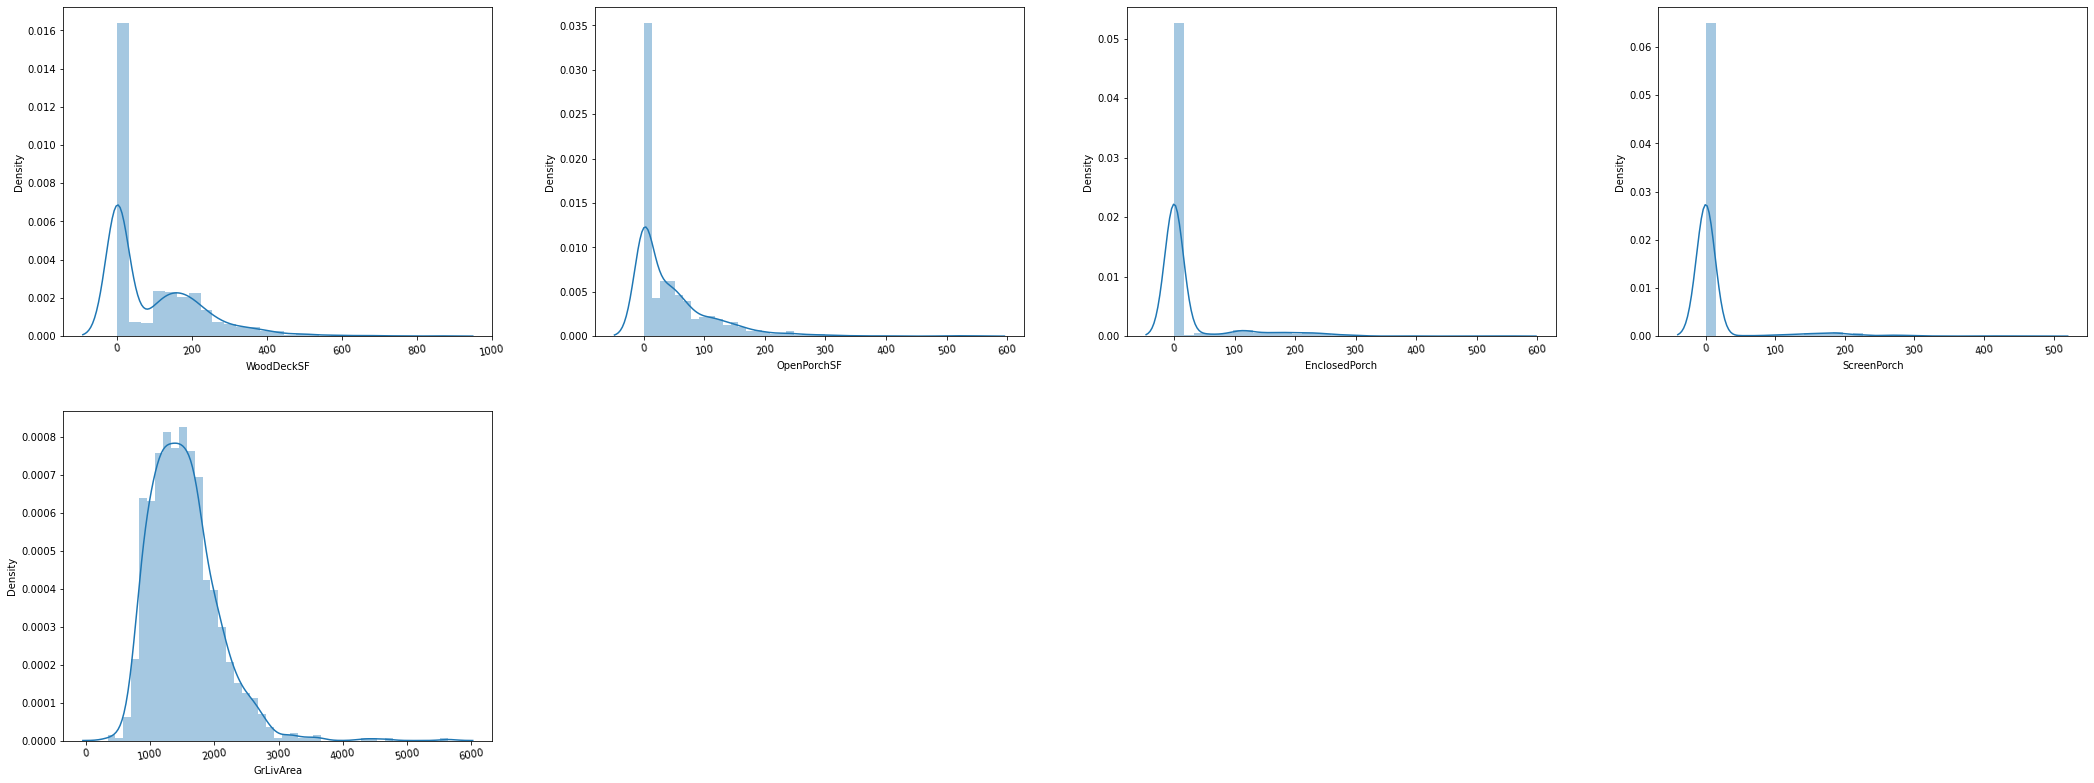

In [99]:
plt.figure(figsize=(30,45))
c=1
for i in numerical:
    plt.subplot(8,4,c)
    sns.distplot(train_data[i])                                 #sns.scatterplot(x =train_data[i], y=train_data.Price)
    plt.xticks(rotation=10)
    plt.tight_layout(pad=4)
    c=c+1
plt.show()

In [100]:
#defining the plot function:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


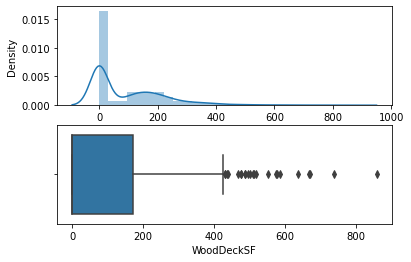

In [101]:
#plotting the arrival time:
plot(train_data,'WoodDeckSF')

So, yes, we have right skewness in the feature WoodDeckSF.

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'MSZoning'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'Street'}>,
        <AxesSubplot:title={'center':'Alley'}>,
        <AxesSubplot:title={'center':'LotShape'}>,
        <AxesSubplot:title={'center':'LandContour'}>],
       [<AxesSubplot:title={'center':'Utilities'}>,
        <AxesSubplot:title={'center':'LotConfig'}>,
        <AxesSubplot:title={'center':'LandSlope'}>,
        <AxesSubplot:title={'center':'Neighborhood'}>,
        <AxesSubplot:title={'center':'Condition1'}>,
        <AxesSubplot:title={'center':'Condition2'}>,
        <AxesSubplot:title={'center':'BldgType'}>,
        <AxesSubplot:title={'center':'HouseStyle'}>,
        <AxesSubplot:title={'center':'OverallQual'}>],
       [<AxesSubplot:title={'center':'OverallCond'}>,
        <AxesS

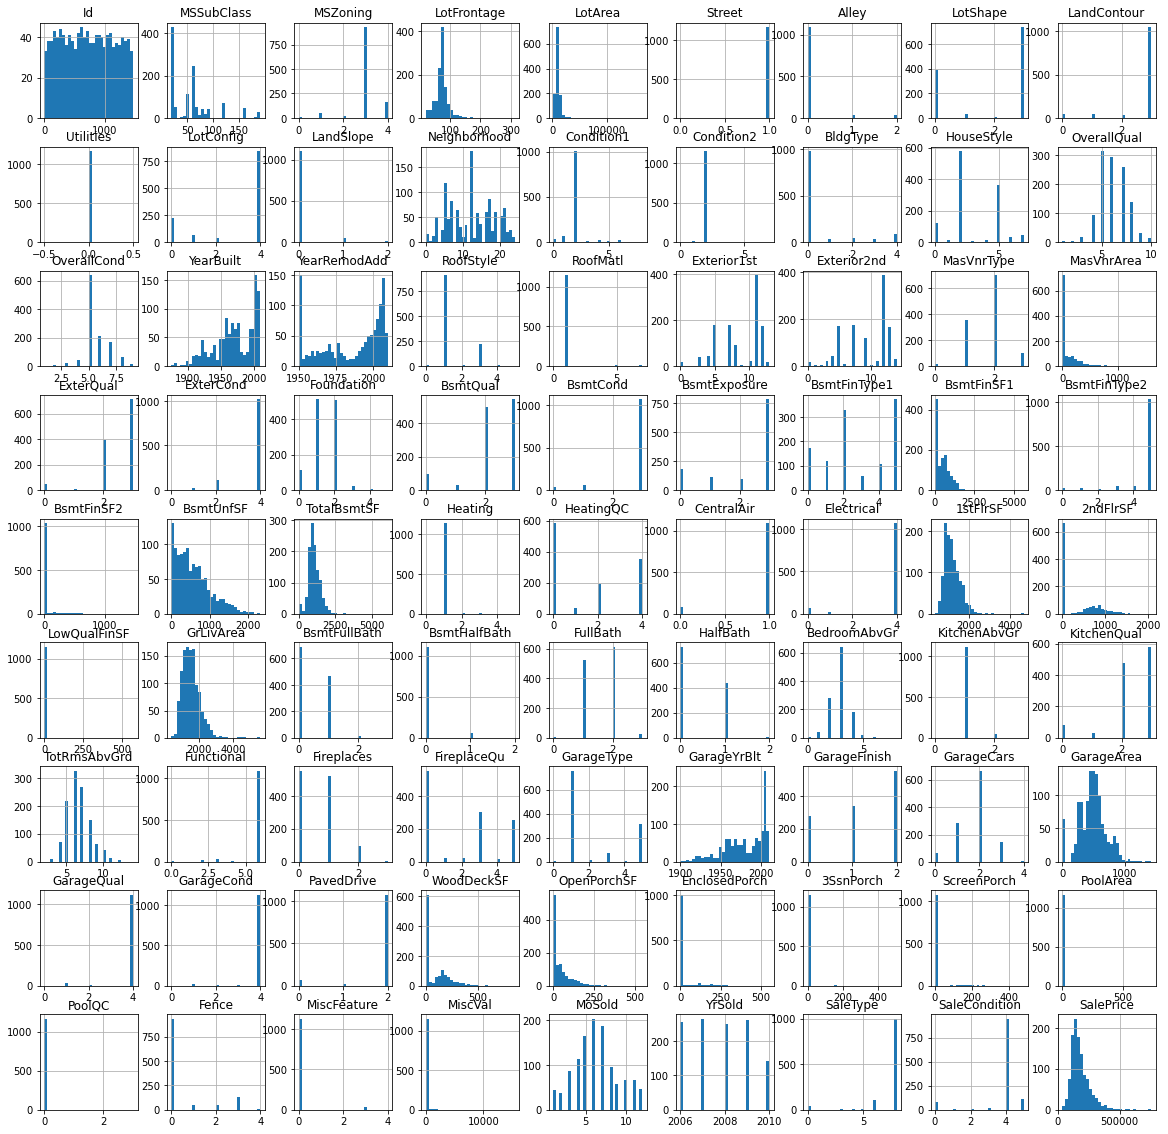

In [102]:
#we will plot histrogram for our numerical data to check skewness of the distribution:
'''Histogram : to see the numeric data distribution'''
train_data.hist(figsize=(20,20), grid = True, bins = 30)
#bos[''].plot.hist()

And yes, as we said initially, we have skewness in all our dataset.

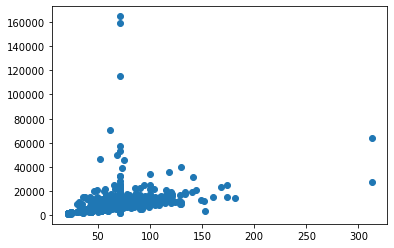

In [103]:
#plotting the scatterplot just to check the feature without skewness:
plt.scatter(train_data['LotFrontage'],train_data['LotArea'])
plt.show()

In [104]:
#checking the skewness of our dataset:
train_data.skew()

Id                0.026526
MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       2.710383
LotArea          10.659285
Street          -17.021969
Alley             4.133729
LotShape         -0.603775
LandContour      -3.125982
Utilities         0.000000
LotConfig        -1.118821
LandSlope         4.812568
Neighborhood      0.043735
Condition1        3.008289
Condition2       11.514458
BldgType          2.318657
HouseStyle        0.285680
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
RoofStyle         1.498560
RoofMatl          7.577352
Exterior1st      -0.612816
Exterior2nd      -0.592349
MasVnrType       -0.104609
MasVnrArea        2.834658
ExterQual        -1.810843
ExterCond        -2.516219
Foundation       -0.002761
BsmtQual         -1.343781
BsmtCond         -3.293554
BsmtExposure     -1.166987
BsmtFinType1     -0.068901
BsmtFinSF1        1.871606
BsmtFinType2     -3.615783
BsmtFinSF2        4.365829
B

In [106]:
#we see skewness in the above grafs. so, let's go and select numerical columns and check their corresponding skewness:
nf = train_data.select_dtypes(include=[np.number]).columns
len(nf)

81

In [107]:
#let's check skewness
from scipy.stats import skew
df=train_data
skew_list = skew(df[nf],nan_policy='omit') #sending all numericalfeatures and omitting nan values
skew_list_df = pd.concat([pd.DataFrame(nf,columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis = 1)

In [108]:
skew_list_df.sort_values(by='Skewness', ascending = False)

,Features,Skewness
75,MiscVal,23.036310
72,PoolQC,14.934052
71,PoolArea,13.226697
14,Condition2,11.499665
4,LotArea,10.645591
39,Heating,10.090629
69,3SsnPorch,9.758059
45,LowQualFinSF,8.655009
22,RoofMatl,7.567618
74,MiscFeature,4.994147


In [109]:
# Import library for VIF to check the multicolinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def CalculateVIF(train_data):
 # Calculating VIF
     vif = dict()
     vif["FeatureColumns"] = train_data.columns
     vif["VIF"] = [variance_inflation_factor(train_data.values, i) for i in range(train_data.shape[1])]
     return(pd.DataFrame(vif))


CalculateVIF(train_data).sort_values(by='VIF',ascending=False)

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,FeatureColumns,VIF
44,2ndFlrSF,inf
36,BsmtFinSF2,inf
34,BsmtFinSF1,inf
46,GrLivArea,inf
45,LowQualFinSF,inf
37,BsmtUnfSF,inf
38,TotalBsmtSF,inf
43,1stFlrSF,inf
77,YrSold,4.532672e+04
19,YearBuilt,3.417935e+04


In [110]:
#let's start dropping the column 2ndFlrSF as it has the highest VIF value:
df_new=train_data.drop(['2ndFlrSF'],axis=1)
CalculateVIF(df_new).sort_values(by='VIF',ascending=False)

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,FeatureColumns,VIF
34,BsmtFinSF1,inf
38,TotalBsmtSF,inf
37,BsmtUnfSF,inf
36,BsmtFinSF2,inf
76,YrSold,4.532672e+04
19,YearBuilt,3.417935e+04
20,YearRemodAdd,2.718793e+04
58,GarageYrBlt,1.838655e+04
5,Street,3.631721e+02
63,GarageCond,9.624992e+01


In [111]:
#let's start dropping the column BsmtFinSF1 as it has the highest VIF value:
df_new=df_new.drop(['BsmtFinSF1'],axis=1)
CalculateVIF(df_new).sort_values(by='VIF',ascending=False)

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,FeatureColumns,VIF
75,YrSold,45326.723813
19,YearBuilt,34179.346379
20,YearRemodAdd,27187.931972
57,GarageYrBlt,18386.551579
5,Street,363.172097
62,GarageCond,96.249916
52,TotRmsAbvGrd,94.656331
44,GrLivArea,93.784328
17,OverallQual,86.780002
14,Condition2,74.094707


In [112]:
#let's start dropping the column YrSold as it has the highest VIF value:
df_new=df_new.drop(['YrSold'],axis=1)
CalculateVIF(df_new).sort_values(by='VIF',ascending=False)

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,FeatureColumns,VIF
19,YearBuilt,23824.074260
20,YearRemodAdd,21555.809678
57,GarageYrBlt,17126.774023
5,Street,361.355732
62,GarageCond,96.021670
52,TotRmsAbvGrd,94.597603
44,GrLivArea,90.449982
17,OverallQual,85.575710
14,Condition2,74.030820
61,GarageQual,71.269138


In [113]:
#let's start dropping the column YearBuilt as it has the highest VIF value:
df_new=df_new.drop(['YearBuilt'],axis=1)
CalculateVIF(df_new).sort_values(by='VIF',ascending=False)

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,FeatureColumns,VIF
19,YearRemodAdd,13921.543382
56,GarageYrBlt,13036.109044
5,Street,360.367124
61,GarageCond,95.740684
51,TotRmsAbvGrd,94.224841
43,GrLivArea,88.954657
17,OverallQual,84.310364
14,Condition2,73.545327
60,GarageQual,71.029885
41,1stFlrSF,66.431739


In [114]:
#let's start dropping the column YearRemodAdd as it has the highest VIF value:
df_new=df_new.drop(['YearRemodAdd'],axis=1)
CalculateVIF(df_new).sort_values(by='VIF',ascending=False)

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,FeatureColumns,VIF
55,GarageYrBlt,864.834470
5,Street,355.269340
60,GarageCond,95.678311
50,TotRmsAbvGrd,93.950721
42,GrLivArea,88.820701
17,OverallQual,83.744578
14,Condition2,73.470287
59,GarageQual,69.781930
40,1stFlrSF,66.255632
32,BsmtFinType2,64.604612


In [115]:
#let's start dropping the column GarageYrBlt as it has the highest VIF value:
df_new=df_new.drop(['GarageYrBlt'],axis=1)
CalculateVIF(df_new).sort_values(by='VIF',ascending=False)

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,FeatureColumns,VIF
5,Street,255.680329
59,GarageCond,93.632338
50,TotRmsAbvGrd,93.333412
42,GrLivArea,87.884956
17,OverallQual,82.269694
14,Condition2,69.739295
58,GarageQual,67.728202
40,1stFlrSF,65.940252
32,BsmtFinType2,61.120235
48,KitchenAbvGr,43.859049


In [116]:
#let's start dropping the column Street as it has the highest VIF value:
df_new=df_new.drop(['Street'],axis=1)
CalculateVIF(df_new).sort_values(by='VIF',ascending=False)

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,FeatureColumns,VIF
49,TotRmsAbvGrd,93.292453
58,GarageCond,93.202277
41,GrLivArea,87.823586
16,OverallQual,81.173581
13,Condition2,68.218252
57,GarageQual,67.037855
39,1stFlrSF,65.839129
31,BsmtFinType2,58.401463
73,SalePrice,43.417255
47,KitchenAbvGr,43.105284


In [117]:
df_new=df_new.drop(['Utilities'],axis=1) #dropping Utilities as it has no values other than 'AllPub'

In [118]:
#Checking the outliers and removing them:
from scipy.stats import zscore
import numpy as np
df=df_new
z=np.abs(zscore(df))
z.shape

(1168, 73)

In [119]:
threhold=3
print(np.where(z>3))

(array([   1,    1,    1, ..., 1166, 1166, 1166]), array([ 9, 18, 31, ..., 36, 57, 58]))


In [120]:
#checking the dataset shape (with outliers and without outliers)
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1168, 73)
(469, 73)


In [121]:
#Percentage of data loss:
loss_perc=(1168-469)/1168*100
loss_perc #since the loss> 10%, so we cant proceed with removing the outliers.

59.8458904109589

In [122]:
#Now let's split the data by features (X, all except Price Column) and target outcome (Y, Price)
df_new=df
X=df_new.drop(['SalePrice'],axis=1)
Y=df_new['SalePrice']

In [123]:
#Transforming the data to remove the skewness:
from sklearn.preprocessing import power_transform
x=power_transform(X,method='yeo-johnson')

In [124]:
#now we will standardrize the data 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.54496771,  1.37043471, -0.16245555, ..., -1.71943737,
         0.40906852,  0.02973498],
       [ 0.46194084, -1.16799937, -0.16245555, ...,  1.32061233,
         0.40906852,  0.02973498],
       [ 0.25422089,  0.49004711, -0.16245555, ..., -0.07674981,
         0.40906852,  0.02973498],
       ...,
       [-1.30033656,  1.70079773, -0.16245555, ...,  0.28887797,
         0.40906852,  0.02973498],
       [-1.97567978,  0.69655685, -2.92646435, ...,  0.28887797,
         0.40906852,  0.02973498],
       [-0.14748082,  0.49004711, -0.16245555, ..., -0.07674981,
         0.40906852,  0.02973498]])

In [125]:
#Modeling
#We now proceed to the main step of our machine learning, fitting the model and predicting the outputs. We fit the data into multiple regression models to compare the performance of all models and select the best model –

#Importing libraries 

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [126]:
#split data in training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.25, random_state=0)


In [127]:
#Building Machine Learning Models
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
for i in range(0,10):
    X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.25, random_state=i)
    lr.fit(X_train,Y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state {i}, the training accuracy is:  {r2_score(Y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:  {r2_score(Y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:  0.842674824932169
At random state 0, the testing accuracy is:  -8905577.80601287


At random state 1, the training accuracy is:  0.840839420485328
At random state 1, the testing accuracy is:  -40885593.335468374


At random state 2, the training accuracy is:  0.8452960844817375
At random state 2, the testing accuracy is:  0.7729060599006488


At random state 3, the training accuracy is:  0.8291504906816367
At random state 3, the testing accuracy is:  0.8335751514956865


At random state 4, the training accuracy is:  0.8417288628246193
At random state 4, the testing accuracy is:  0.7537691717861521


At random state 5, the training accuracy is:  0.8694463153817669
At random state 5, the testing accuracy is:  0.5998770145562484


At random state 6, the training accuracy is:  0.8311852195650096
At random state 6, the testing accuracy is:  0.8265151330221464


At random state 7, the training accuracy is:  0.8210603293907677
At random state 7, t

In [128]:
#let's take radom state of 8

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.25, random_state=8)
lr.fit(X_train,Y_train)


LinearRegression()

In [129]:
#checking the R2 Score for the linear regression:
from sklearn.metrics import r2_score
pred_test=lr.predict(X_test)
print(r2_score(Y_test,pred_test))
pred_train=lr.predict(X_train)
print(r2_score(Y_train,pred_train))

0.8300436704144418
0.8278222172210207


In [130]:
print('training accuracy',r2_score(Y_train,pred_train))
print('test accuracy', r2_score(Y_test,pred_test))

training accuracy 0.8278222172210207
test accuracy 0.8300436704144418


In [131]:
#Cross validation of the model Linear regression:
Train_accuracy=r2_score(Y_train,pred_train)
Test_accuracy=r2_score(Y_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,20):
    cv_score=cross_val_score(lr,x,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the CV score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the CV score is -64293424.49066141 and accuracy score for training is 0.8278222172210207 and accuracy for the testing is 0.8300436704144418


At cross fold 3 the CV score is 0.755006366527955 and accuracy score for training is 0.8278222172210207 and accuracy for the testing is 0.8300436704144418


At cross fold 4 the CV score is 0.7654886151828887 and accuracy score for training is 0.8278222172210207 and accuracy for the testing is 0.8300436704144418


At cross fold 5 the CV score is 0.7596955542259932 and accuracy score for training is 0.8278222172210207 and accuracy for the testing is 0.8300436704144418


At cross fold 6 the CV score is 0.7717017801752027 and accuracy score for training is 0.8278222172210207 and accuracy for the testing is 0.8300436704144418


At cross fold 7 the CV score is 0.7693670745484368 and accuracy score for training is 0.8278222172210207 and accuracy for the testing is 0.8300436704144418


At cross fold 8 the CV score is 0.7729327427883759 an

In [132]:
#Regularization: importing libraries:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings('ignore')

In [133]:
#we will cross validate with Lasso techniquue
from sklearn.linear_model import Lasso
parameters={ 'alpha':[.0001,.001,.01,.1,1,10], 'random_state': list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [134]:
#checking the r2 score with Lasso technique:
ls=Lasso(alpha=10,random_state=0)
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)
pred_ls=ls.predict(X_test)
lss=r2_score(Y_test,pred_ls)
lss

0.8308316643764486

In [135]:
#best cross fold is 8
cv_score=cross_val_score(ls,x,Y,cv=8)
cv_mean=cv_score.mean()
cv_mean

0.7740410260144035

In [136]:
pred_test=ls.predict(X_test)
print(r2_score(Y_test,pred_test))
pred_train=ls.predict(X_train)
print(r2_score(Y_train,pred_train))

0.8308316643764486
0.8278248060869714


In [137]:
#Cross validation of the model Linear regression:
Train_accuracy=r2_score(Y_train,pred_train)
Test_accuracy=r2_score(Y_test,pred_test)
for j in range(2,20):
    cv_score=cross_val_score(ls,x,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the CV score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the CV score is 0.7494313589266115 and accuracy score for training is 0.8278248060869714 and accuracy for the testing is 0.8308316643764486


At cross fold 3 the CV score is 0.757254616485992 and accuracy score for training is 0.8278248060869714 and accuracy for the testing is 0.8308316643764486


At cross fold 4 the CV score is 0.770891161680394 and accuracy score for training is 0.8278248060869714 and accuracy for the testing is 0.8308316643764486


At cross fold 5 the CV score is 0.7599917746698853 and accuracy score for training is 0.8278248060869714 and accuracy for the testing is 0.8308316643764486


At cross fold 6 the CV score is 0.7727583795440199 and accuracy score for training is 0.8278248060869714 and accuracy for the testing is 0.8308316643764486


At cross fold 7 the CV score is 0.7702798079540559 and accuracy score for training is 0.8278248060869714 and accuracy for the testing is 0.8308316643764486


At cross fold 8 the CV score is 0.7740410260144035 and

In [138]:
#best cross fold is 8
cv_score=cross_val_score(ls,x,Y,cv=10)
cv_mean=cv_score.mean()
cv_mean

0.7741076415681989

In [139]:
pred_test=ls.predict(X_test)
print(r2_score(Y_test,pred_test))
pred_train=ls.predict(X_train)
print(r2_score(Y_train,pred_train))

0.8308316643764486
0.8278248060869714


In [140]:
#let's try with Ensemble Technique including Random ForestRegressor:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [141]:
#Checking the R2 Score an CV of Rfr:
rf=RandomForestRegressor(criterion="mae",max_features="log2")
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
pred_decision=rf.predict(X_test)

rfs=r2_score(Y_test,pred_decision)
print('R2 score:',rfs*100)

rfscore=cross_val_score(rf,x,Y, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:', rfc*100)

pred_test=rf.predict(X_test)
print(r2_score(Y_test,pred_test))

R2 score: 88.31328358796982
Cross Val Score: 83.3713739265107
0.8831328358796982


In [142]:
#cheching the differents alrorithms and compare their results:

dt=DecisionTreeRegressor()
svr=SVR()
knn=KNeighborsRegressor()
lr=LinearRegression()

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=42)
for i in [dt,svr,knn,lr]:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    test_score=r2_score(y_test,pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.1:
        print(i)
        print("R2 score is: ", r2_score(y_test,pred))
        print("R2 score for train data: ", r2_score(y_train,i.predict(x_train)))
        print("Mean absolute error is: ", mean_absolute_error(y_test, pred))
        print("Mean squared error is: ", mean_squared_error(y_test, pred))
        print("Root mean squared error is: ", (mean_squared_error(y_test,pred))) 

DecisionTreeRegressor()
R2 score is:  1.0
R2 score for train data:  1.0
Mean absolute error is:  0.0
Mean squared error is:  0.0
Root mean squared error is:  0.0
SVR()
R2 score is:  0.8672968888089221
R2 score for train data:  0.9545401128806528
Mean absolute error is:  0.3205258617746336
Mean squared error is:  0.25181436333224394
Root mean squared error is:  0.25181436333224394
KNeighborsRegressor()
R2 score is:  0.7471180197163076
R2 score for train data:  0.809491911196146
Mean absolute error is:  0.5390410958904109
Mean squared error is:  0.47986301369863016
Root mean squared error is:  0.47986301369863016
LinearRegression()
R2 score is:  0.9991353797275955
R2 score for train data:  0.9992631341156604
Mean absolute error is:  0.029159435581718112
Mean squared error is:  0.001640683488619887
Root mean squared error is:  0.001640683488619887


In [143]:
#importing the RFR, ADBR, GBR and comparing these too:

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

rfr=RandomForestRegressor()
adaB=AdaBoostRegressor()
gbr=GradientBoostingRegressor()


x_train, x_test, y_train, y_test=train_test_split(x,Y,test_size=0.25,random_state=42)
for i in [rfr,adaB,gbr]:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    test_score=r2_score(y_test,pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.3:
        print(i)
        print("R2 score is: ", r2_score(y_test,pred))
        print("R2 score for train data: ", r2_score(y_train,i.predict(x_train)))
        print("Mean absolute error is: ", mean_absolute_error(y_test, pred))
        print("Mean squared error is: ", mean_squared_error(y_test, pred))
        print("Root mean squared error is: ", (mean_squared_error(y_test,pred)))
              

RandomForestRegressor()
R2 score is:  0.8075868631277086
R2 score for train data:  0.9793590917517665
Mean absolute error is:  20171.531815068498
Mean squared error is:  1339703081.8538563
Root mean squared error is:  1339703081.8538563
AdaBoostRegressor()
R2 score is:  0.7520331449967733
R2 score for train data:  0.8725607917915611
Mean absolute error is:  26584.25632773111
Mean squared error is:  1726503529.0491652
Root mean squared error is:  1726503529.0491652
GradientBoostingRegressor()
R2 score is:  0.8169721396884237
R2 score for train data:  0.9718431118047034
Mean absolute error is:  19127.96062120554
Mean squared error is:  1274356795.5408478
Root mean squared error is:  1274356795.5408478


In [144]:
#we see the GBR and RFR are the best algorithms for this dataset, so let's study these 2 and compare the results:

gbr=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None,
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
test_score=r2_score(y_test,pred)
train_score=r2_score(y_train,gbr.predict(x_train))
if abs(train_score-test_score)<=0.3:
    print(gbr)
    print("R2 score is: ", r2_score(y_test,pred))
    print("R2 score for train data: ", r2_score(y_train,gbr.predict(x_train)))
    print("Mean absolute error is: ", mean_absolute_error(y_test, pred))
    print("Mean squared error is: ", mean_squared_error(y_test, pred))
    print("Root mean squared error is: ", (mean_squared_error(y_test,pred)))
              

GradientBoostingRegressor()
R2 score is:  0.8143245200279854
R2 score for train data:  0.9718431118047034
Mean absolute error is:  19128.578425060477
Mean squared error is:  1292791213.6701066
Root mean squared error is:  1292791213.6701066


In [145]:
#checking the best cross validation for GBR and checking the mean of CV:
from sklearn.model_selection import cross_val_score
for i in range(2,9):
    cv=cross_val_score(gbr,x,y,cv=i)
    print(gbr,cv.mean())
    
    #0.999237328

GradientBoostingRegressor() 0.9983560682054795
GradientBoostingRegressor() 0.9993658557246352
GradientBoostingRegressor() 0.9993983555113912
GradientBoostingRegressor() 0.9996033774564859
GradientBoostingRegressor() 0.9994866940727661
GradientBoostingRegressor() 0.9995696976753522
GradientBoostingRegressor() 0.9997045823395898


In [146]:
#checking the best cross validation for RFR and checking the mean of CV:
from sklearn.model_selection import cross_val_score
for i in range(2,9):
    cv=cross_val_score(rfr,x,y,cv=i)
    print(rfr,cv.mean())
    #0.998729629

RandomForestRegressor() 0.9976949456014776
RandomForestRegressor() 0.9986040858173978
RandomForestRegressor() 0.9987551240866779
RandomForestRegressor() 0.9987699476806717
RandomForestRegressor() 0.9989085317248249
RandomForestRegressor() 0.9989838914812319
RandomForestRegressor() 0.9988549182632893


In [147]:
#checking the best cross validation for RFR and checking the mean of CV:
from sklearn.model_selection import cross_val_score
for i in range(2,9):
    cv=cross_val_score(dt,x,y,cv=i)
    print(rfr,cv.mean())
    #0.998346871

RandomForestRegressor() 0.9952866113053827
RandomForestRegressor() 0.9982546971620838
RandomForestRegressor() 0.998297817888113
RandomForestRegressor() 0.9987155642158445
RandomForestRegressor() 0.9991505141711422
RandomForestRegressor() 0.9992114673042068
RandomForestRegressor() 0.9982447434877744


In [148]:
#let's try to see if we can better resukts if RFR:
rfr2=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) #0.8844732565790787

rfr2.fit(x_train,y_train)
pred=rfr2.predict(x_test)
test_score=r2_score(y_test,pred)
train_score=r2_score(y_train,rfr2.predict(x_train))
if abs(train_score-test_score)<=0.3:
    print(rfr2)
    print(abs(train_score-test_score))
    print("R2 score is: ", r2_score(y_test,pred))
    print("R2 score for train data: ", r2_score(y_train,rfr2.predict(x_train)))
    print("Mean absolute error is: ", mean_absolute_error(y_test, pred))
    print("Mean squared error is: ", mean_squared_error(y_test, pred))
    print("Root mean squared error is: ", (mean_squared_error(y_test,pred)))


RandomForestRegressor(n_estimators=10)
0.19411154347843507
R2 score is:  0.7741193090258238
R2 score for train data:  0.9682308525042589
Mean absolute error is:  22486.83287671233
Mean squared error is:  1572725556.832603
Root mean squared error is:  1572725556.832603


In [149]:
#let's search the best parameters for our best model RFR through Gridsearch:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[10,50,100,200], 'max_depth':[None,1,3], 'min_samples_split': [2,4,10]}

gcv_rfr=GridSearchCV(rfr,param_grid,cv=3)

#fitting the model:

res=gcv_rfr.fit(x_train,y_train)

res.best_params_ #checking the best parameters:

{'max_depth': None, 'min_samples_split': 4, 'n_estimators': 100}

In [150]:
res.best_score_ #checking the best score for model RFR for the given parameters:

0.8273770263159319

In [151]:
#let's check rfr2:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[10,50,100,200], 'max_depth':[None,1,3], 'min_samples_split': [2,4,10]}

gcv_rfr2=GridSearchCV(rfr2,param_grid,cv=3)

#fitting the model:

res2=gcv_rfr2.fit(x_train,y_train)

res2.best_params_ #checking the best parameters:

{'max_depth': None, 'min_samples_split': 4, 'n_estimators': 100}

In [152]:
res2.best_score_ #and best score for rfr2:

0.8243948152729882

In [153]:
#to avoid overfitting, on our second best model too we will do the gridsearch for GBR:
param_grid2={'alpha':[0.09,0.98], 'learning_rate':[0.01,0.1],'max_depth':[5,2], 'min_samples_leaf':[1,2], 'n_estimators': [10,100]}
gcv_gd=GridSearchCV(gbr,param_grid2,cv=3)
res3=gcv_gd.fit(x_train,y_train)
res3.best_params_ #checking for best parameters:

{'alpha': 0.98,
 'learning_rate': 0.1,
 'max_depth': 2,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [154]:
res3.best_score_ #checking for best score for GBR:

0.8388957070086875

In [155]:
#creating model instance with best params for GBR model:                        
model=GradientBoostingRegressor(alpha=0.098,
                                learning_rate=0.1,
                                max_depth=2,
                                min_samples_leaf=1,
                                n_estimators=100)

model.fit(x_train,y_train)
pred=model.predict(x_test)
test_score=r2_score(y_test,pred)
train_score=r2_score(y_train,model.predict(x_train))
if abs(train_score-test_score)<=0.3:
    print(rfr2)
    print(abs(train_score-test_score))
    print("R2 score is: ", r2_score(y_test,pred))
    print("R2 score for train data: ", r2_score(y_train,model.predict(x_train)))
    print("Mean absolute error is: ", mean_absolute_error(y_test, pred))
    print("Mean squared error is: ", mean_squared_error(y_test, pred))
    print("Root mean squared error is: ", (mean_squared_error(y_test,pred)))

RandomForestRegressor(n_estimators=10)
0.12196356755754423
R2 score is:  0.8248015242251906
R2 score for train data:  0.9467650917827348
Mean absolute error is:  19605.17013144875
Mean squared error is:  1219843622.670082
Root mean squared error is:  1219843622.670082


In [156]:
#another try
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=6)]
max_depth=[int(x) for x in np.linspace(start=5, stop=30, num=4)]

random_grid={
    'n_estimators': n_estimators,
    'max_features': ['auto','sqrt'],
    'max_depth':max_depth,
    'min_samples_split':[5,10,15,100]}

rf_random=RandomizedSearchCV(estimator= model, param_distributions= random_grid, cv=3, verbose=2, n_jobs=-1)
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 100,
 'min_samples_split': 15,
 'max_features': 'sqrt',
 'max_depth': 5}

In [157]:
rf_random.best_score_ #we see the results are the worst:

-0.17053446678790363

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

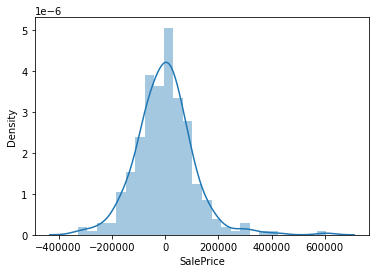

In [158]:
#predicting and plotting the residuals:
prediction=model.predict(X_test)
sns.distplot(y_test-prediction)

In [159]:
#r2 score of the predicted values (*from training set) compared to actual price:
result_ontestfromtrainingset=r2_score(Y_test,prediction)
abs(result_ontestfromtrainingset)

0.9218462803998849

In [160]:
test_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [161]:
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [162]:
#label_encoding for the testing categories which are object type:
from sklearn.preprocessing import LabelEncoder

for col in test_data.columns:
        if test_data[col].dtype == object:
            #train_data[col] = LabelEncoder().fit_transform(train_data[col])
            test_data[col] = LabelEncoder().fit_transform(test_data[col].astype(str))

In [163]:
X.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'Poo

In [164]:

#dropping out the features we didnt used for training purposes as we may have dropped them before the training of the algorithms:
test_data.drop(['Street','Utilities','YearBuilt','YearRemodAdd','BsmtFinSF1','2ndFlrSF','GarageYrBlt','YrSold'],axis=1, inplace=True)

In [166]:
#saving the model:
import pickle
filename='SalePrice.pkl'
pickle.dump(model,open(filename,'wb'))

In [167]:
#loading the model and checking the accuracy on the test data:
import pickle
loaded_model=pickle.load(open('SalePrice.pkl','rb'))
result=loaded_model.score(X_test,Y_test)
print(result)

0.9218462803998849


In [168]:
#92,18% is a good accuracy on the test data:
Conclusion=pd.DataFrame([loaded_model.predict(test_data)[:],pred_decision[:]],index=["Predicted","Original"])


In [169]:
#here you have a glimpse of test dataset:
Conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291
Predicted,447597.662202,374818.105542,342527.294055,296617.606011,449880.145248,334424.320698,442037.259652,446857.276995,442839.88558,445001.709461,295310.181577,300203.611794,324680.679647,463848.246334,447597.662202,295517.418115,337388.770507,324680.679647,447284.192507,334702.857589,324680.679647,444544.160984,403581.717528,272146.384369,295517.418115,295310.181577,334154.714489,403581.717528,452682.417491,297372.985648,263298.299418,445001.709461,334702.857589,458512.262071,295310.181577,331649.356371,448024.577714,392268.254971,336985.340635,331649.356371,292479.555432,449139.76004,382009.431098,330016.66391,324680.679647,297877.780416,295310.181577,324680.679647,447597.662202,455422.098668,330016.66391,342163.851416,292479.555432,292479.555432,444544.160984,292345.731768,326536.24718,334154.714489,324546.855983,446857.276995,295383.594451,449880.145248,297372.985648,440406.110405,447597.662202,294628.214814,332299.146956,332847.290056,324680.679647,445490.865694,449139.76004,495424.024909,332361.387677,435057.501706,448591.039802,336985.340635,454969.60462,439699.005239,458023.105838,403566.723098,336985.340635,294762.038478,435057.501706,441521.292731,449880.145248,347410.784271,292479.555432,448024.577714,326963.162692,336985.340635,330016.66391,297165.749111,296022.212883,297165.749111,449139.76004,445001.709461,455422.098668,449880.145248,447597.662202,292479.555432,449880.145248,439665.725197,294335.122965,329793.788838,336985.340635,322867.437212,383696.521016,483010.39689,443803.775777,332361.387677,335414.888894,452682.417491,332299.146956,347410.784271,297799.901161,292479.555432,340541.508578,334154.714489,327511.305792,273242.507174,292479.555432,447597.662202,323998.712883,338524.339347,296617.606011,449880.145248,295517.418115,382721.462404,267906.52291,332780.547016,300203.611794,336985.340635,334702.857589,491850.960734,440839.325968,447597.662202,447597.662202,302486.09484,334702.857589,459016.483438,328907.781634,461247.239165,263298.299418,444544.160984,310629.05543,332299.146956,382490.89322,292479.555432,238743.261378,448024.577714,447284.192507,295310.181577,336985.340635,292479.555432,340426.63319,336985.340635,443803.775777,349899.400652,294335.122965,449139.76004,445742.094668,327511.305792,332847.290056,398688.287311,368381.101719,447597.662202,336985.340635,449880.145248,292479.555432,332299.146956,332299.146956,298348.044261,295310.181577,454681.713461,439665.725197,462794.041086,292479.555432,339786.355181,302486.09484,352037.672318,332299.146956,334702.857589,447597.662202,332299.146956,469390.199755,447597.662202,460305.588884,339244.338041,334154.714489,404008.63304,394565.732447,447597.662202,489568.477688,337388.770507,294335.122965,337388.770507,445001.709461,445742.094668,292479.555432,437339.984752,442261.677938,393383.437298,453422.802698,492621.752665,292479.555432,446735.472268,336985.340635,404008.63304,320072.456155,445001.709461,343257.259

In [ ]:
#BMB